# Skillbox. Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала 2 млн заёмщиков на сумму более 1 млрд долларов. Она считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Kiva помогла 2,7 млн нуждающихся.
* 1,7 млн небезразличных участников, желающих помочь.
* 83 страны.
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% — доля возврата средств инвесторам (очень высокий показатель).
* 81% заёмщиков Kiva — женщины.
* Кредит Kiva финансируется каждые 2 минуты.



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задач и формулирование вопросов
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь их интересуют не дисперсия пожертвований и статистические показатели, а ощутимые выводы и рекомендации, которые позволят организации работать эффективнее и лучше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

- Проверьте, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомьтесь с датасетом, изучите его базовые характеристики, выявите первоначальные зависимости.
- Изучите основные демографические характеристики людей, которые используют Kiva. Из каких они регионов и стран? Какова гендерная характеристика заёмщиков?
- Посмотрите, для каких целей людям нужны средства и какие суммы они просят. Изучите сектора экономики, виды деятельности и сделайте выводы о том, как обстоят дела в каждом из них.
- Немаловажным является ещё один вопрос: как долго заёмщикам приходится ждать полного финансирования заявки? Известно, что некоторые люди на платформе просят ссуды на неотложные нужды.
- Попробуйте изучить факторы, влияющие на время, которое потребуется на погашение ссуды и суммы кредита. Возможно, это поможет лучше узнать, сколько люди в конкретных регионах могут себе позволить выплачивать на самые важные нужды.
- Сформулируйте основные выводы и приложите визуальные материалы, подкрепляющие их.


## 1.4. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита.
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD).
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD).
- sector — сектор использования займа.
- activity — более гранулированная категория.
- use — назначение использования суммы кредита.
- country_code — ISO-код страны страны, в которой был выдан заём.
- country — полное название страны, в которой был выдан кредит.
- posted_time — время, в которое заявка была опубликована на Kiva.
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму.
- funded_time — время, когда заявка полностью финансируется кредиторами.
- term_in_months — срок, на который был выдан кредит в месяцах.
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит.
- loaner_genders — разделённые запятыми буквы M, F, где каждый экземпляр представляет одного мужчину/женщину в группе.

**kiva_mpi_region_locations** — Набор данных о регионах с показателями MPI:
(Global Multidimensional Poverty Index — глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше уровень бедности в соответствующем регионе. 
- country — страна.
- region — регион в стране.
- world_region — часть света.
- MPI — многомерный индекс бедности.
- geo — координаты (широта, долгота).



# 2. Разведочный анализ данных
***

## 2.1. Знакомство с датасетом
***

Давайте импортируем необходимые библиотеки и загрузим предоставленные наборы данных в память.

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os
import sys

In [2]:
df_kiva_loans = pd.read_csv("../kiva/kiva_loans.csv")
df_mpi = pd.read_csv("../kiva/kiva_mpi_region_locations.csv")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных.

In [3]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Давайте посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе.

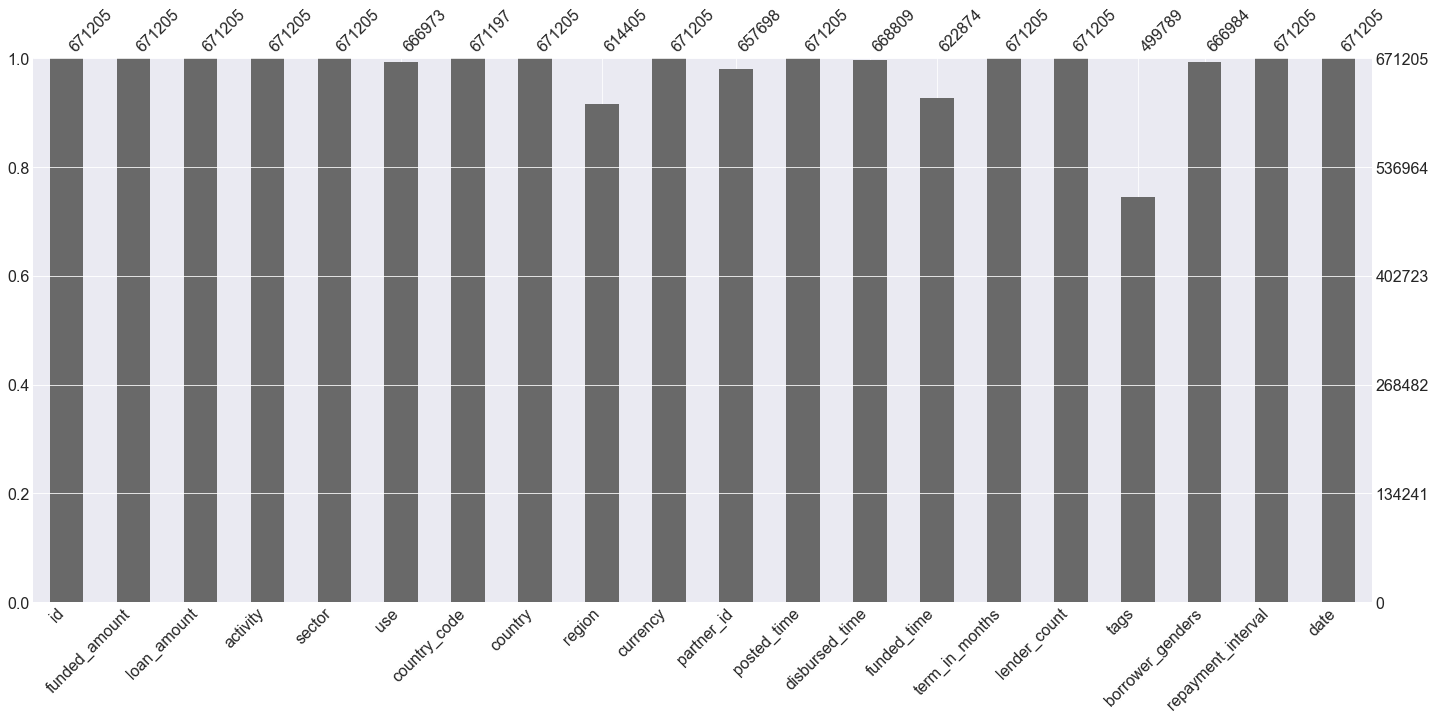

In [4]:
msno.bar(df_kiva_loans)

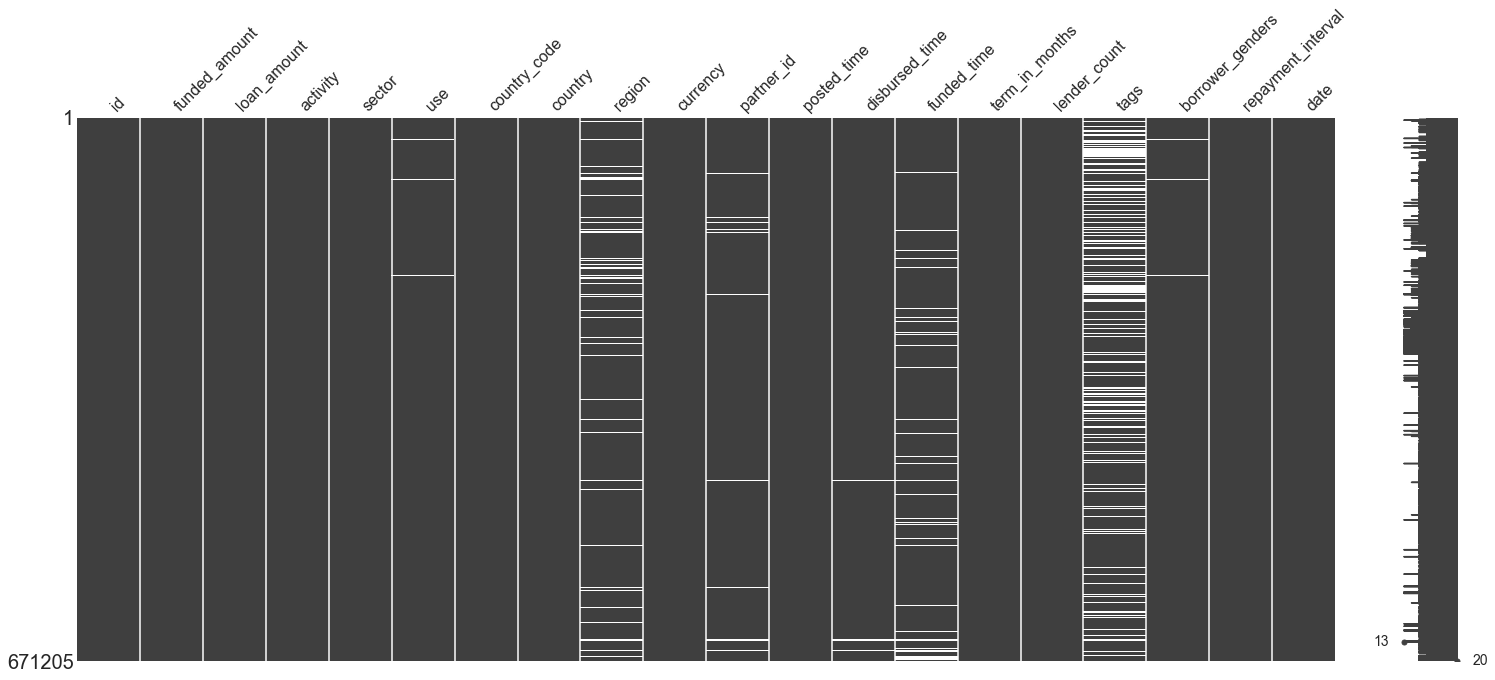

In [5]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Далее приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них.

In [6]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [7]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [8]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые мы можем сделать:**
* В этом датасете содержатся данные о **87** странах почти на всех континентах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **сельское хозяйство**.
* Имеется довольно широкий разброс значений по ряду числовых атрибутов, таких как сумма займа, срок погашения кредита.
* В этом наборе данных **11 298** разных значений пола! Очевидно, что это невозможно. Надо обязательно попытаться понять, почему у нас такой набор значений. Помним, что для качественной аналитики нужно понимать анализируемый продукт. Поэтому ответ на этот вопрос очень важен.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование — **450** долларов. Возможно, это означает, что существует небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что ещё более важно: есть только 1298 различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдаётся более **500** займов. Это даёт нам чёткое представление о том, насколько важна эта краудсорсинговая платформа и какое влияние она оказывает.


## 2.2. Пользователи Kiva
***

В этой части мы сосредоточимся на основных демографических свойствах людей, которые можно получить из выгрузки: где они живут, какой у них пол, для каких нужд они запрашивают финансирование.

### 2.2.1. Из каких стран эти люди?
***


Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.

In [9]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [10]:
list_countries

['Philippines',
 'Kenya',
 'El Salvador',
 'Cambodia',
 'Pakistan',
 'Peru',
 'Colombia',
 'Uganda',
 'Tajikistan',
 'Ecuador',
 'Paraguay',
 'Nicaragua',
 'India',
 'Vietnam',
 'Nigeria',
 'Bolivia',
 'Lebanon',
 'Armenia',
 'Palestine',
 'Samoa',
 'Guatemala',
 'Rwanda',
 'Mali',
 'Honduras',
 'Indonesia',
 'United States',
 'Kyrgyzstan',
 'Togo',
 'Mexico',
 'Sierra Leone',
 'Tanzania',
 'Ghana',
 'Jordan',
 'Zimbabwe',
 'Madagascar',
 'Liberia',
 'Haiti',
 'Mozambique']

In [11]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

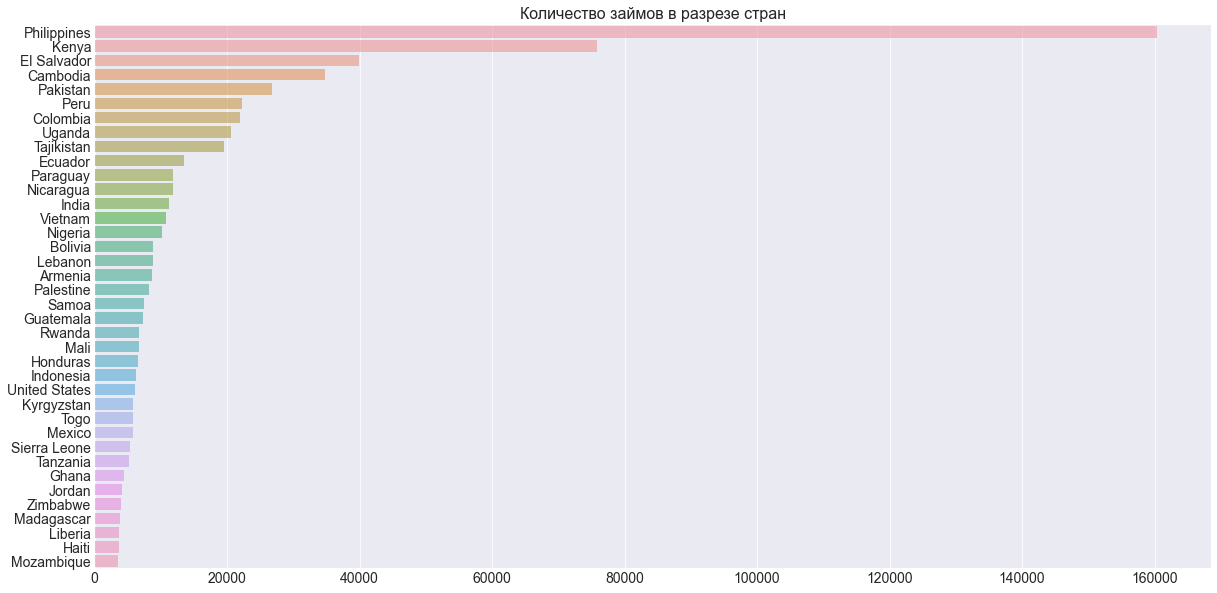

In [12]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины.

Возможно, потому что там широко распространены краткосрочные и небольшие займы.
Давайте запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Но вообще ни одной из стран Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в них не такой, как в других странах. 

Попробуем сгруппировать страны по частям света.



Для этого воспользуемся файлом **kiva_mpi_region_locations**.

In [13]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [14]:
list(df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'])

[(('AFG', 'Afghanistan', 'South Asia'),
  0     0.387
  1     0.466
  2     0.300
  3     0.301
  4     0.325
  5     0.313
  6     0.319
  7     0.250
  8     0.245
  9     0.384
  10    0.261
  11    0.353
  12    0.293
  13    0.117
  14    0.437
  15    0.280
  16    0.296
  17    0.269
  18    0.294
  19    0.369
  20    0.187
  21    0.287
  22    0.231
  23    0.611
  24    0.137
  25    0.218
  26    0.120
  27    0.294
  28    0.350
  29    0.341
  30    0.361
  31    0.624
  32    0.340
  33    0.175
  Name: MPI, dtype: float64),
 (('ALB', 'Albania', 'Europe and Central Asia'),
  34   NaN
  Name: MPI, dtype: float64),
 (('ARM', 'Armenia', 'Europe and Central Asia'),
  35   NaN
  Name: MPI, dtype: float64),
 (('AZE', 'Azerbaijan', 'Europe and Central Asia'),
  36   NaN
  Name: MPI, dtype: float64),
 (('BDI', 'Burundi', 'Sub-Saharan Africa'),
  37    0.164
  38    0.501
  39    0.473
  40    0.499
  41    0.422
  Name: MPI, dtype: float64),
 (('BEN', 'Benin', 'Sub-Saharan Afric

In [15]:
df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean()

ISO  country       world_region             
AFG  Afghanistan   South Asia                   0.309853
ALB  Albania       Europe and Central Asia           NaN
ARM  Armenia       Europe and Central Asia           NaN
AZE  Azerbaijan    Europe and Central Asia           NaN
BDI  Burundi       Sub-Saharan Africa           0.411800
                                                  ...   
VUT  Vanuatu       East Asia and the Pacific         NaN
YEM  Yemen         Arab States                  0.225952
ZAF  South Africa  Sub-Saharan Africa                NaN
ZMB  Zambia        Sub-Saharan Africa           0.312200
ZWE  Zimbabwe      Sub-Saharan Africa           0.151400
Name: MPI, Length: 102, dtype: float64

In [16]:
df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0)

ISO  country       world_region             
AFG  Afghanistan   South Asia                   0.309853
ALB  Albania       Europe and Central Asia      0.000000
ARM  Armenia       Europe and Central Asia      0.000000
AZE  Azerbaijan    Europe and Central Asia      0.000000
BDI  Burundi       Sub-Saharan Africa           0.411800
                                                  ...   
VUT  Vanuatu       East Asia and the Pacific    0.000000
YEM  Yemen         Arab States                  0.225952
ZAF  South Africa  Sub-Saharan Africa           0.000000
ZMB  Zambia        Sub-Saharan Africa           0.312200
ZWE  Zimbabwe      Sub-Saharan Africa           0.151400
Name: MPI, Length: 102, dtype: float64

In [17]:
df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0).reset_index()

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [18]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [19]:
df_mpi_grouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [20]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [21]:
df_kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,NaN,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


In [22]:
regions = df_kiva_loans['world_region'].value_counts()

In [23]:
df_kiva_loans['world_region'].value_counts()

East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: world_region, dtype: int64

In [24]:
regions_list = regions.index.to_list()
regions_list

['East Asia and the Pacific',
 'Sub-Saharan Africa',
 'Latin America and Caribbean',
 'Europe and Central Asia',
 'South Asia',
 'Arab States']

In [25]:
regions.values

array([206949, 162903, 133759,  38827,  38815,   9187], dtype=int64)

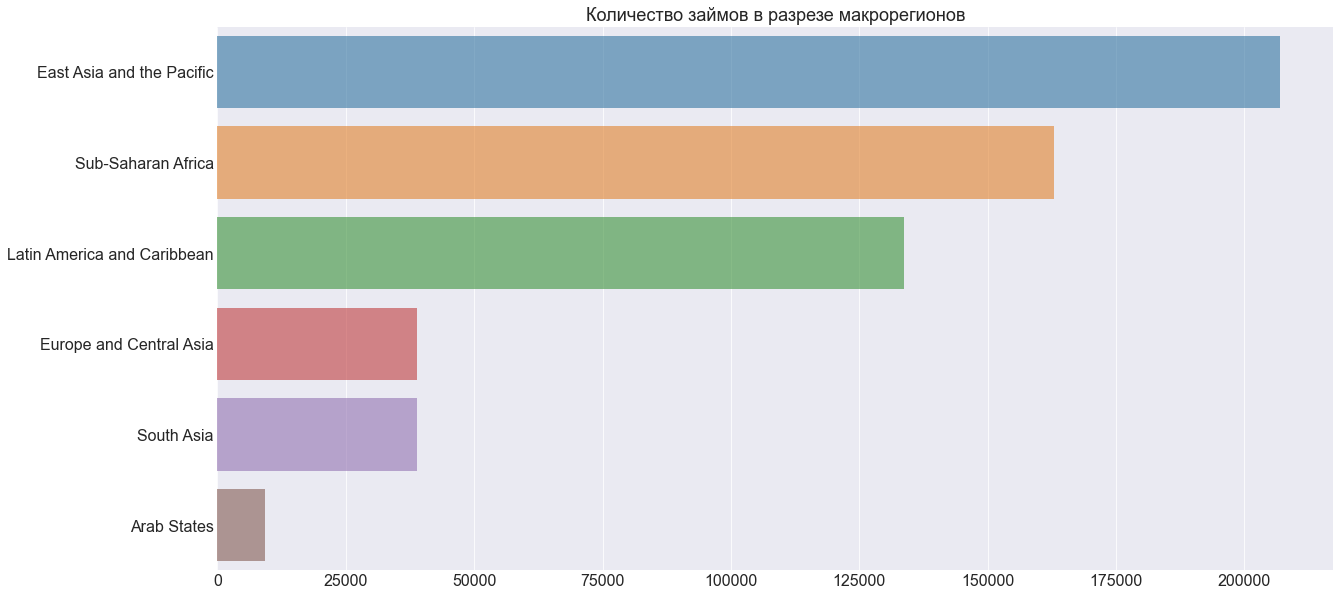

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show()

Очевидным становится наличие трёх лидеров и трёх аутсайдеров по количеству выданных займов.

Исходя из этого, можно предположить, что в трёх регионах-аутсайдерах либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо она пока не набрала те обороты, что мы видим в трёх регионах-лидерах. Присутствие региона «Арабские страны» свидетельствует в пользу первого предположения.

### 2.2.2. Люди какого пола обращаются за финансированием?
***

In [27]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                        426502
male                                                                                                          134710
female, female                                                                                                 12164
female, female, female                                                                                         11676
female, female, female, female                                                                                  9052
                                                                                                               ...  
male, female, male, male, male, female, female, male, male, female, female, male, male, male, female, male         1
female, female, male, male, male, female, male, female, female, male, male                                         1
male, male, female, female, male, female, male, female, female, 

Во многих займах заёмщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заёмщиков на круговой диаграмме.

In [28]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders']]
# здесь можно использовать и такой способ
# [elem if elem in ['female','male'] or not pd.notna(elem) else 'group' for elem in df_kiva_loans['borrower_genders']]

In [29]:
# это эквивалентно следующему выражению
# gender_list = []
# for elem in df_kiva_loans['borrower_genders']:
#     if elem in ['female','male']:
#         gender_list.append(elem)
#     else:
#         gender_list.append('group')
# gender_list

In [30]:
df_kiva_loans['borrower_genders']

0         female
1          group
2         female
3         female
4         female
           ...  
671200    female
671201    female
671202     group
671203    female
671204    female
Name: borrower_genders, Length: 671205, dtype: object

In [31]:
borrowers = df_kiva_loans['borrower_genders'].value_counts()
borrowers

female    426502
male      134710
group     109993
Name: borrower_genders, dtype: int64

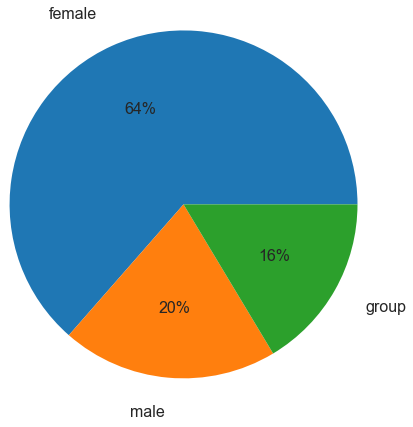

In [32]:
plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заёмщиков — женщины, и это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заёмщиков — женщины?**

In [33]:
df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders'].count()

country   borrower_genders
Armenia   female              5383
          group                  3
          male                3245
Bolivia   female              3735
          group               2661
                              ... 
Vietnam   group               4606
          male                 489
Zimbabwe  female              2688
          group               1189
          male                 157
Name: borrower_genders, Length: 114, dtype: int64

In [34]:
# list(df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders'].count().groupby(level=0))

In [35]:
# df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()) # в процентах

In [36]:
# df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack('borrower_genders').fillna(0)[-20:]

In [37]:
# df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['female', 'male'])[-20:][['female', 'male', 'group']]

In [38]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

In [39]:
df_gender_by_country

borrower_genders,female,male,group
country,,,
Sierra Leone,57.266851,7.959372,34.773777
Indonesia,58.046347,21.097522,20.856131
Colombia,58.458741,38.008638,3.532621
El Salvador,58.771160,39.791850,1.436991
Lebanon,60.748408,27.070064,12.181529
Armenia,62.368208,37.597034,0.034758
Jordan,63.618910,34.557235,1.823854
Kenya,65.570722,19.564787,14.864491
Zimbabwe,66.633614,3.891919,29.474467


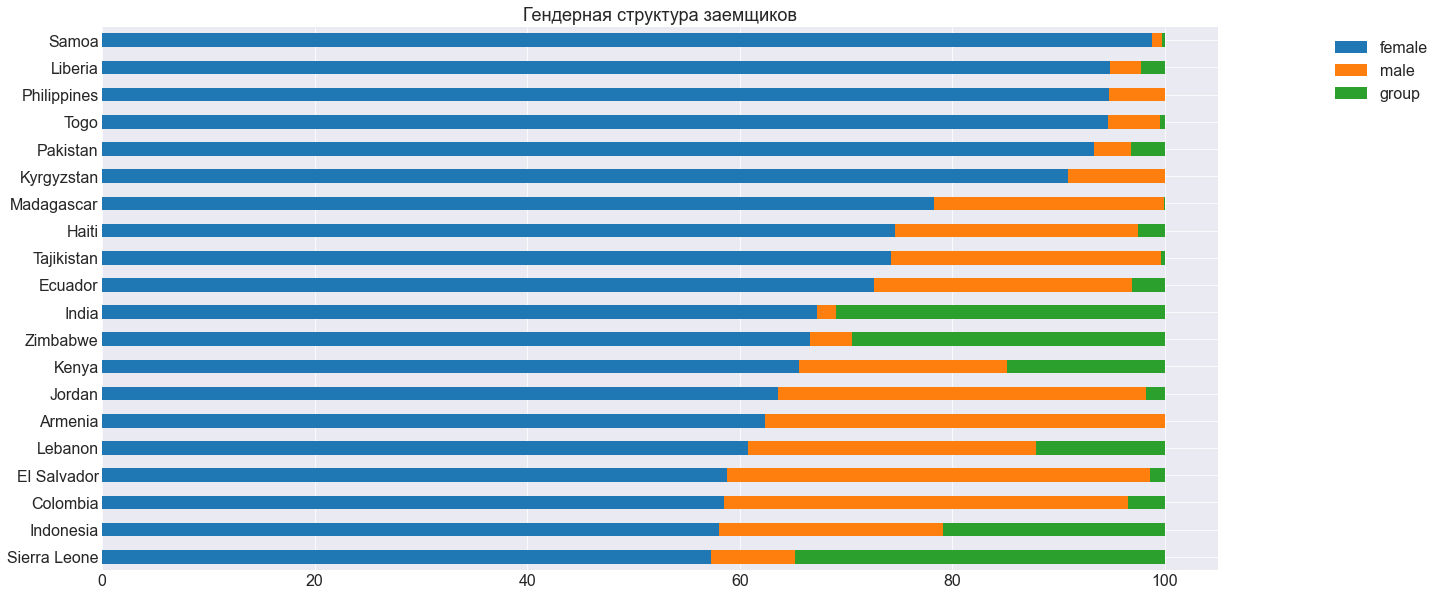

In [40]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1, .001, .001), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заёмщиков в разрезе стран?**

Например, в связи с направлениями, традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

`Вопрос для самостоятельной работы`

**А в каких странах преобладают мужчины? Группа людей?**

In [41]:
# отсортируем датафрейм по странам, где больше всего заёмщиков - мужчин
df_men_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])[-20:]

df_men_by_country = df_men_by_country[['male', 'female', 'group']]

In [42]:
df_men_by_country

borrower_genders,male,female,group
country,,,
Madagascar,21.617378,78.304109,0.078513
Haiti,22.830293,74.599226,2.570481
Rwanda,22.865627,34.387528,42.746845
Ecuador,24.236373,72.635160,3.128467
Tajikistan,25.459653,74.182840,0.357508
Lebanon,27.070064,60.748408,12.181529
Bolivia,27.367704,42.414263,30.218033
Nicaragua,28.698752,50.072150,21.229098
Honduras,31.401556,57.023029,11.575416


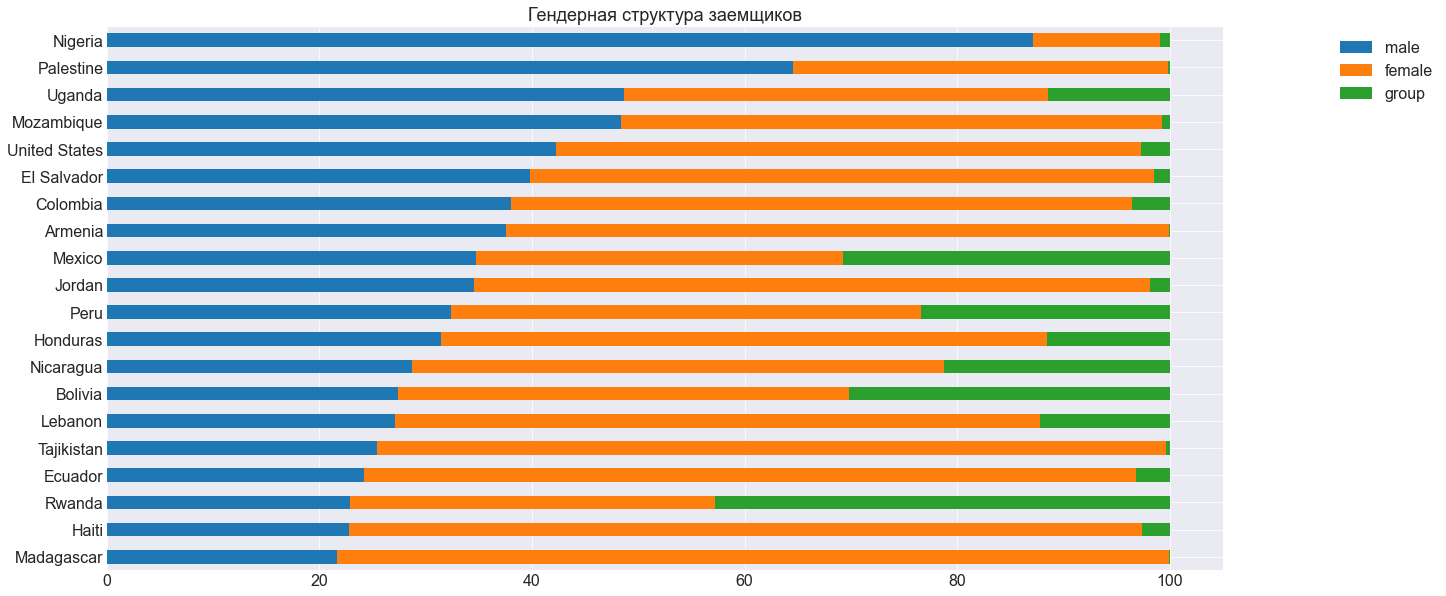

In [43]:
plot = df_men_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1, .001, .001), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Мужчины-заёмщики преобладают в таких странах как: **Нигерия**, **Палестина**, **Уганда**, **Мозамбик**, **США**

In [44]:
# отсортируем датафрейм по странам, где больше всего заёмщиков - группы людей
df_group_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group'])[-20:]

df_group_by_country = df_group_by_country[['group', 'male', 'female']]

In [45]:
df_group_by_country

borrower_genders,group,male,female
country,,,
Uganda,11.421776,48.701519,39.876705
Honduras,11.575416,31.401556,57.023029
Lebanon,12.181529,27.070064,60.748408
Kenya,14.864491,19.564787,65.570722
Indonesia,20.856131,21.097522,58.046347
Nicaragua,21.229098,28.698752,50.072150
Peru,23.357172,32.375298,44.267530
Zimbabwe,29.474467,3.891919,66.633614
Bolivia,30.218033,27.367704,42.414263


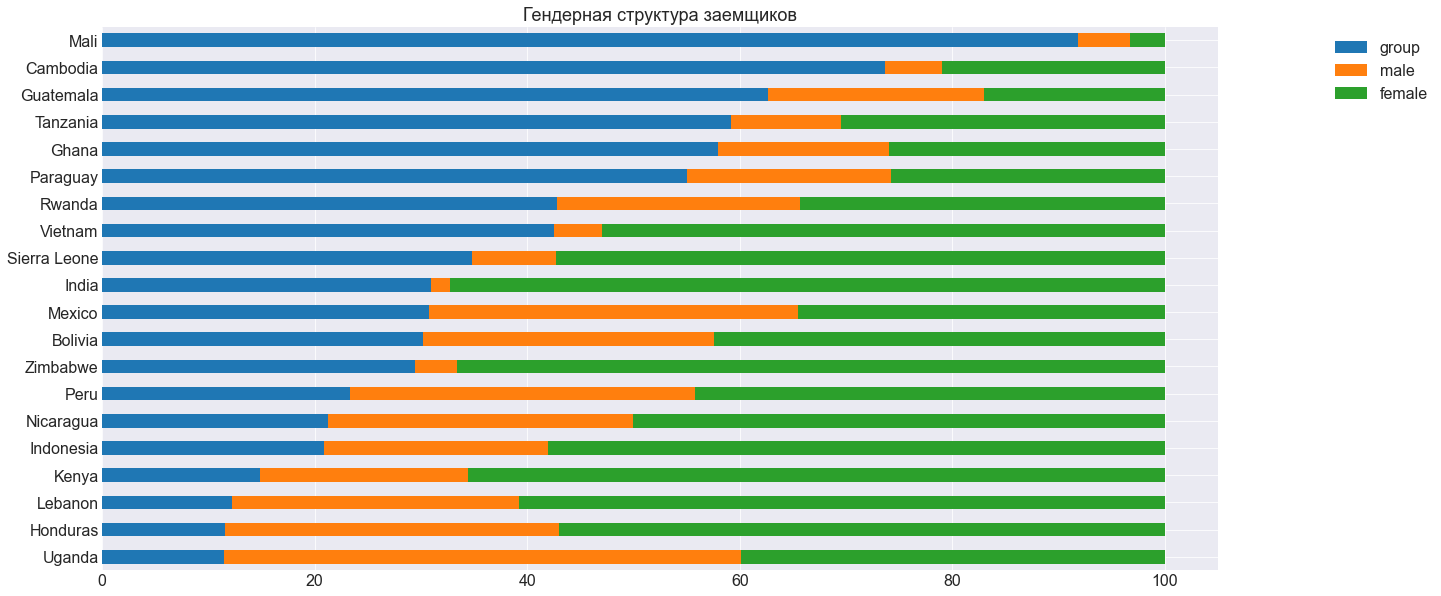

In [46]:
plot = df_group_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1, .001, .001), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Группы заёмщиков преобладают в таких странах как: **Мали**, **Камбоджа**, **Гватемала**, **Танзания**, **Гана**

## 2.3. Количество займов
***

Теперь давайте посмотрим, для чего людям нужны кредиты и какие суммы они просят. 

### 2.3.1. В разрезе секторов
***

Начнём с секторов экономики. 
В сводке, которую мы видели выше, было 15 уникальных секторов. Рассмотрим, как обстоят дела в каждом из них.

In [47]:
sectors = df_kiva_loans['sector'].value_counts()
sectors

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64

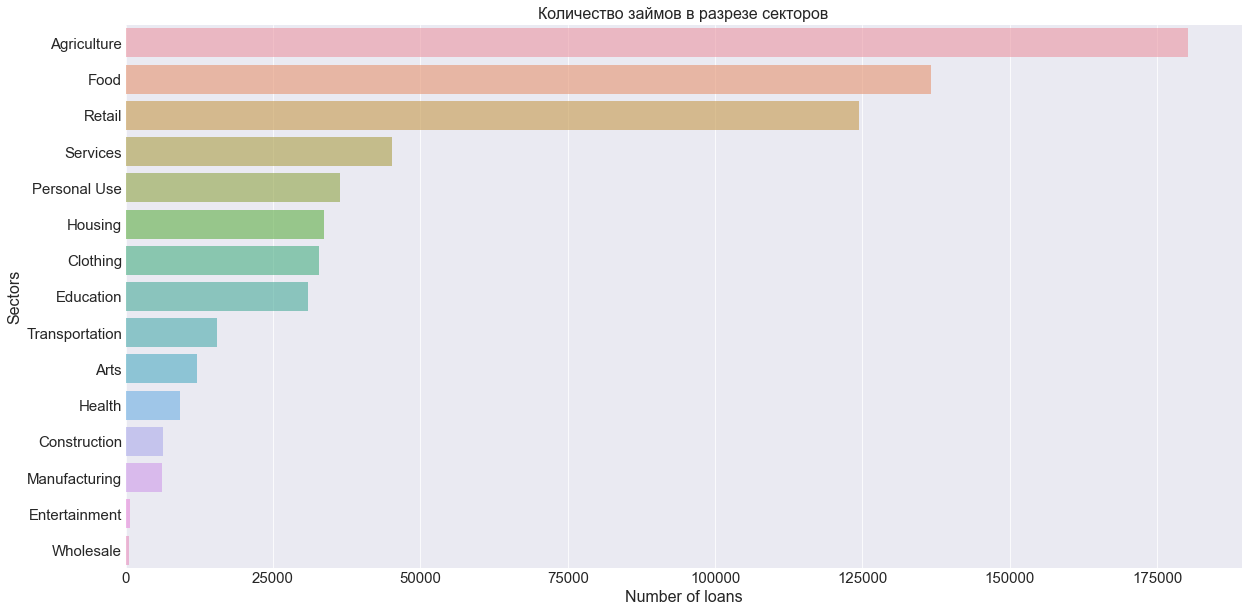

In [48]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
plt.xlabel('Number of loans', fontsize=16)
plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

Самым доминирующим сектором является **сельское хозяйство**, за ним следуют **пищевая промышленность** и **торговля**.
Это неудивительно, учитывая список стран, которые интенсивно используют Kiva. Например, беглый осмотр первых страниц сайта свидетельствует о таких примерах: покупка качественных семян и удобрений для использования на ферме и в садоводческом хозяйстве, закупка свежей еды, злаков, рыбы, овощей для обеспечения работы предприятия общественного питания. Можно сделать ряд выводов о структуре экономик этих стран, свидетельствующих о том, что это сугубо развивающиеся страны, полагающиеся преимущественно на аграрную отрасль.

Важно отметить, что кредиты на **личные нужды** также занимают значительную долю. Это означает, что есть люди, которые используют Kiva, потому что они крайне нуждаются.

Гораздо меньшие доли занимают **строительство**, **производство**, а также сфера **развлечений** и **оптовой торговли**.

### 2.3.2. В разрезе видов деятельности
***

Давайте посмотрим более подробную версию и сделаем подсчёт для **видов деятельности**.

In [49]:
activities = df_kiva_loans['activity'].value_counts().head(30)
activities

Farming                           72955
General Store                     64729
Personal Housing Expenses         32448
Food Production/Sales             28106
Agriculture                       27023
Pigs                              26624
Retail                            24771
Clothing Sales                    22339
Home Appliances                   20267
Higher education costs            19742
Fruits & Vegetables               16610
Grocery Store                     15102
Livestock                         13095
Fish Selling                      13060
Food                              10197
Fishing                           10066
Services                           9807
Poultry                            9783
Tailoring                          9657
Animal Sales                       9237
Food Stall                         8905
Sewing                             8414
Dairy                              7914
Cereals                            7898
Cattle                             7865


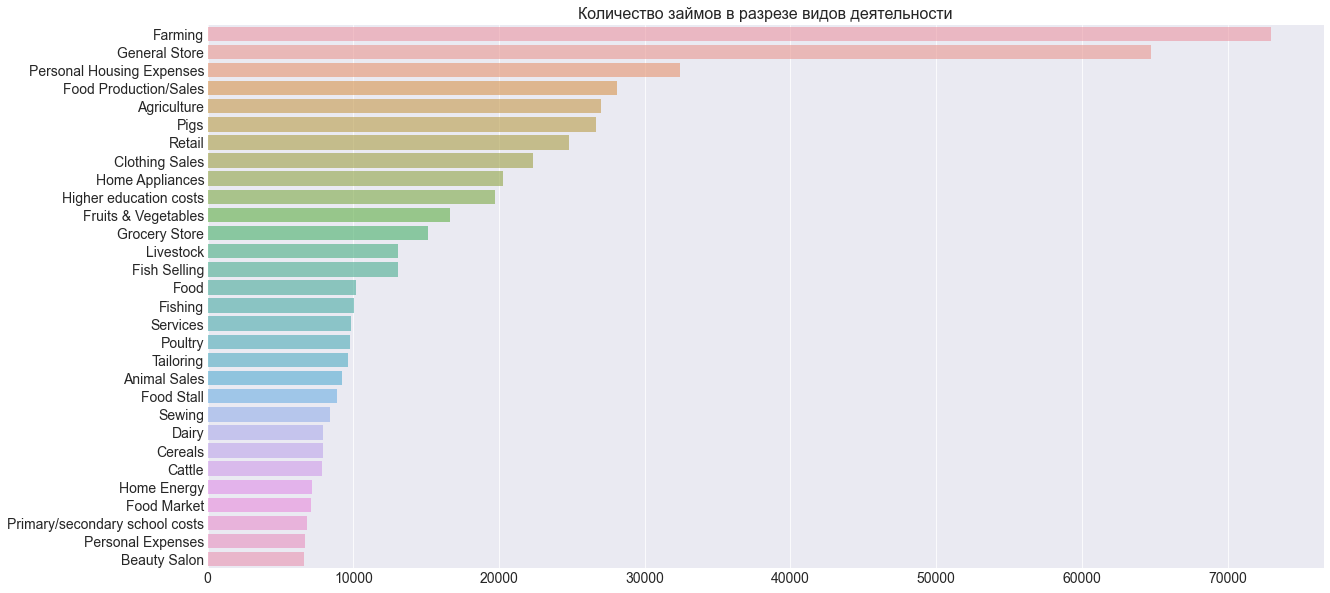

In [50]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show()

Детализация по видам деятельности подтверждает наши наблюдения. В лидерах __фермерство__, **розничные магазины**, **домашнее хозяйство**, а также **расходы на жильё**.

### 2.3.3. Рейтинг целевого назначения займа
***

In [51]:
activities = df_kiva_loans['use'].value_counts().head(25)
activities.head(25)

to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                    

Интересные выводы можно сделать из описания назначения каждого займа.

В лидерах по целевому назначению займов — вещи, удовлетворяющие базовые человеческие потребности, такие как **покупка фильтра для воды**, **оборудование септика**, **светильники на солнечных батареях**.

### 2.3.4. Наиболее популярные виды деятельности
***

Сейчас предлагаю наглядно сравнить наиболее популярные направления займов.
Для этого сгруппируем займы по признакам **sector, activity** и посмотрим на топ-10 в каждой группе.

In [52]:
loans_by_activity_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()
loans_by_activity_sector

,sector,activity,loan_amount
0,Agriculture,Agriculture,27023
1,Agriculture,Animal Sales,9237
2,Agriculture,Aquaculture,108
3,Agriculture,Beekeeping,50
4,Agriculture,Cattle,7865
...,...,...,...
124,Services,Water Distribution,564
125,Transportation,Motorcycle Transport,5888
126,Transportation,Rickshaw,2878
127,Transportation,Taxi,2631


In [53]:
df_kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,group,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


In [54]:
loans_by_activity_sector.sector.unique()

array(['Agriculture', 'Clothing', 'Education', 'Food', 'Housing',
       'Personal Use', 'Retail', 'Services', 'Transportation'],
      dtype=object)

In [55]:
loans_by_activity_sector[loans_by_activity_sector.sector.eq('Agriculture')].dropna().sort_values(by='loan_amount')[-10:]

,sector,activity,loan_amount
8,Agriculture,Flowers,821
6,Agriculture,Farm Supplies,4352
4,Agriculture,Cattle,7865
5,Agriculture,Dairy,7914
1,Agriculture,Animal Sales,9237
12,Agriculture,Poultry,9783
10,Agriculture,Livestock,13095
11,Agriculture,Pigs,26624
0,Agriculture,Agriculture,27023
7,Agriculture,Farming,72955


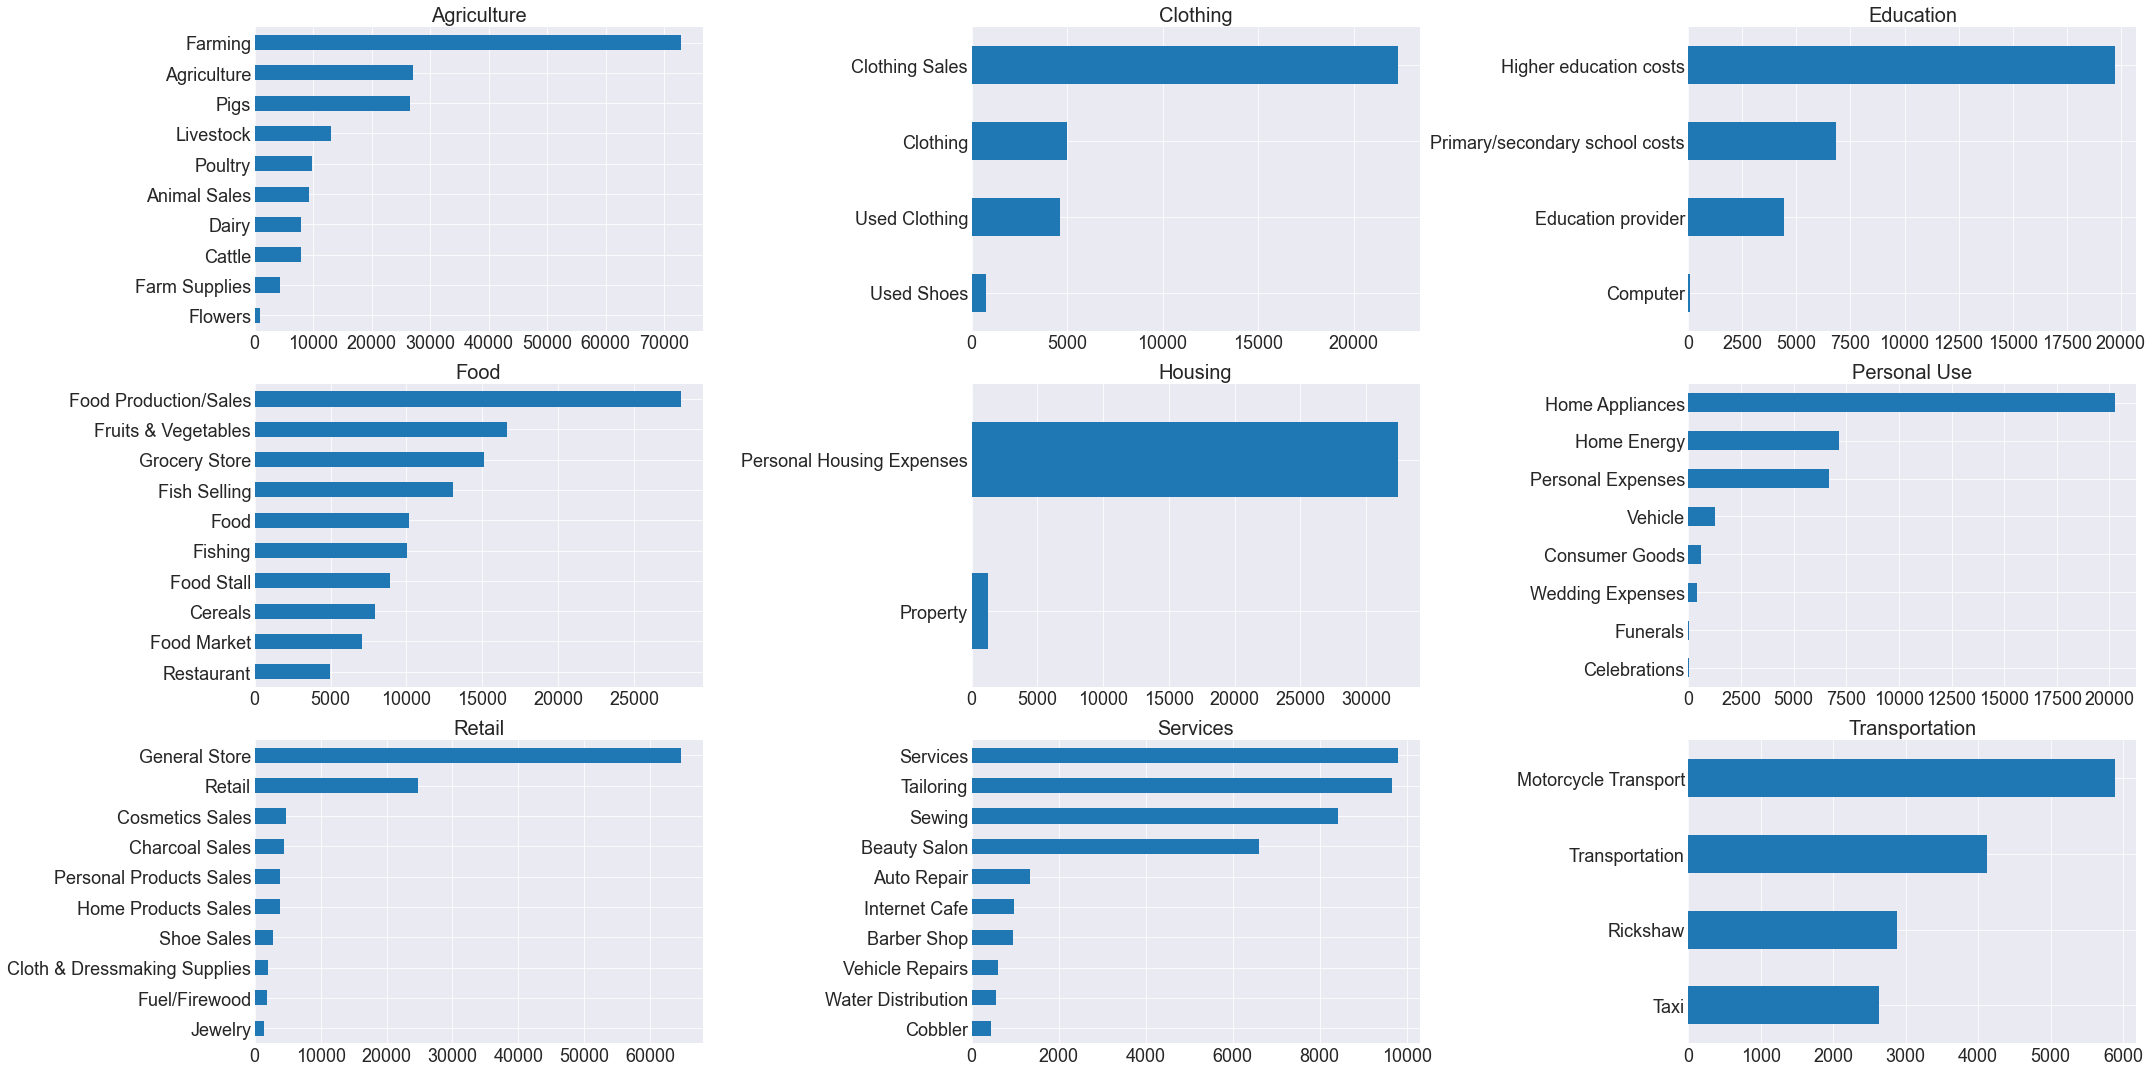

In [56]:
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

Основной вывод, который мы можем сделат: львиная доля займов направлены на деятельность с невысокой добавленной стоимостью — **сельское хозяйство, розничная торговля, сервис**. То есть деятельность, в которой минимально задействованы смежные сектора экономики и невысок потенциал создания дополнительных рабочих мест и продуктов внутри страны, в отличие от, например, **производственных предприятий, строительства, ремесленных мастерских, лёгкой промышленности**.

И тем не менее, не может не радовать присутствие такого направления, как, например, **образование**: финансирование обучения школах и университетах, организация и подготовка курсов и образовательных программ.

## 2.4. Объём финансирования
***

2.4.1. Распределение суммы займа
***

Не менее важную информацию могут дать абсолютные значения займов, которые люди в разных странах запрашивают на реализацию своих целей.

Давайте посмотрим на график распределения сумм займов.

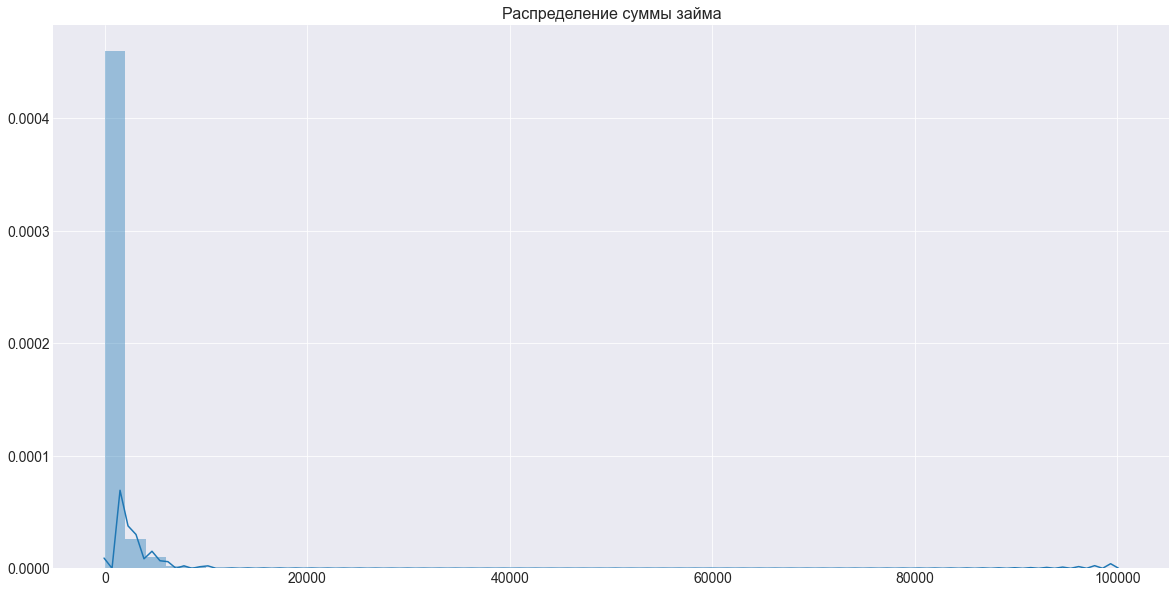

In [57]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень-то информативен в этой форме: нам нужно **усечь данные**, исключив выбросы из рассмотрения. Каким образом мы можем это сделать?

Предлагаю использовать основное, но очень мощное правило: правило трёх сигм — **68–95–99.7**. Это правило гласит, что для нормального распределения:
* 68.27% значений $ \in [\mu - \sigma , \mu + \sigma]$
* 95.45% значений $ \in [\mu - 2\sigma , \mu + 2\sigma]$
* 99.7% значений $ \in [\mu - 3\sigma , \mu + 3\sigma]$  
где $\mu$ и $\sigma$ — среднее значение и стандартное отклонение нормального распределения.

Здесь верно, что распределение не обязательно нормальное, но для формы, подобной той, которая у нас есть, мы увидим, что применение третьего фильтра **значительно улучшит наши результаты**.

<img src="https://www.researchgate.net/profile/Bin_Wang111/publication/273955667/figure/fig3/AS:339883190177813@1458045875582/The-confidence-intervals-correspond-to-3-sigma-rule-of-the-normal-distribution.png" width="850" height="442" />

In [58]:
df_kiva_loans['loan_amount']

0         300.0
1         575.0
2         150.0
3         200.0
4         400.0
          ...  
671200     25.0
671201     25.0
671202     25.0
671203     25.0
671204     25.0
Name: loan_amount, Length: 671205, dtype: float64

In [59]:
df_kiva_loans['loan_amount'] - df_kiva_loans['loan_amount'].mean()

0        -542.397107
1        -267.397107
2        -692.397107
3        -642.397107
4        -442.397107
             ...    
671200   -817.397107
671201   -817.397107
671202   -817.397107
671203   -817.397107
671204   -817.397107
Name: loan_amount, Length: 671205, dtype: float64

In [60]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
dev

0         542.397107
1         267.397107
2         692.397107
3         642.397107
4         442.397107
             ...    
671200    817.397107
671201    817.397107
671202    817.397107
671203    817.397107
671204    817.397107
Name: loan_amount, Length: 671205, dtype: float64

In [61]:
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
std

1198.6600728834771

In [62]:
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]
df_kiva_loans_trimmed

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,group,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


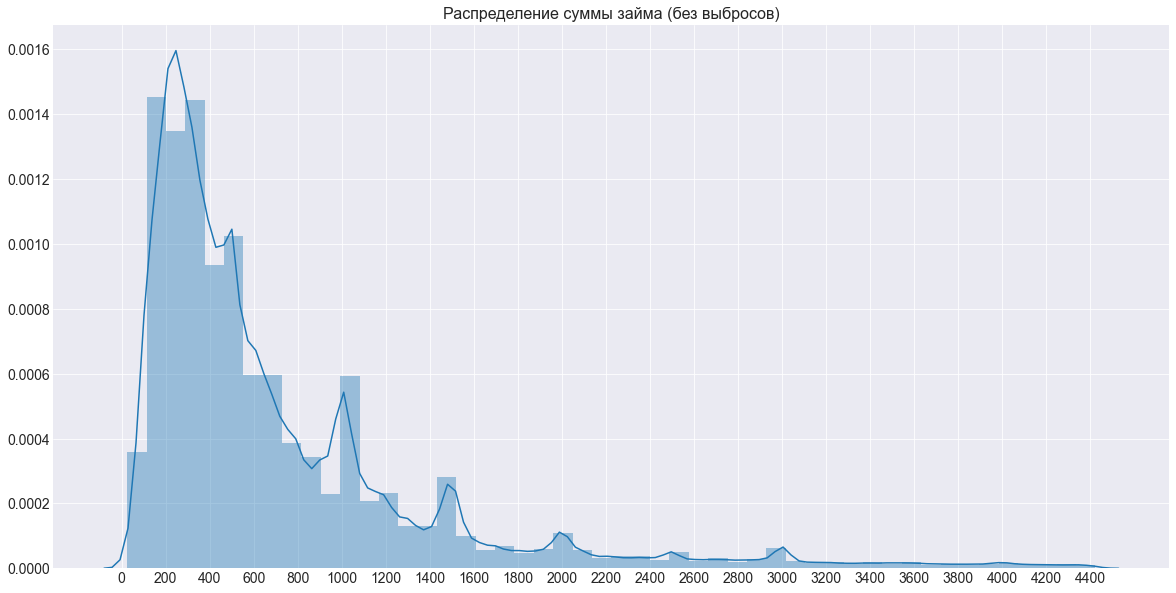

In [63]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

Теперь явно намного лучше!

* Большинство ссуд составляют от 100 до 600 долларов США с пиковыми значениями в районе 200 и 400 долларов США.
* Сумма, естественно, уменьшается, но мы можем заметить наличие её нескольких пиков в 1000 (наиболее чёткий), 1500 и 2000 долларов США. Можно предположить, что есть определённый класс проектов, которые являются более «сложными» и финансируются бОльшими суммами.

### 2.4.2. Суммы займа в разрезе секторов
***

Как насчёт больших подробностей? У нас есть информация о сумме кредита в целом, давайте теперь посмотрим разбиение по секторам:

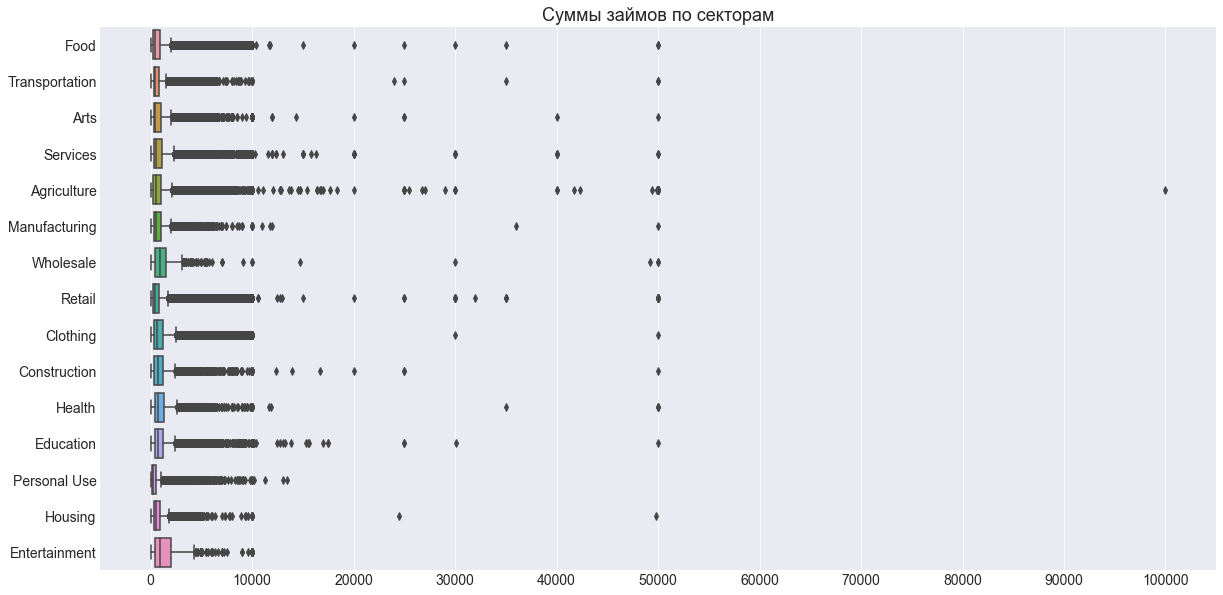

In [64]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

Как видите, для любого сектора есть значения-выбросы. И почти для всех секторов, кроме **личные нужды, индустрия развлечений**, — наличие займов на суммы в районе $50.000.

Например, кажется, что кто-то запросил кредит на 100 000 для сельскохозяйственного проекта. Есть также много займов на суммы 20к, 50к.

`Вопрос для самостоятельной работы:`

**Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей?**

Рассмотрим топ-20 стран с самыми большими займами

In [65]:
df_max_loans = df_kiva_loans[['funded_amount', 'loan_amount', 'country', 'region', 'world_region', 'activity', 'sector', 'use', 'borrower_genders', 'MPI']]\
                            .sort_values(by='loan_amount', ascending=False)

Рассмотрим назначение заявок с самыми большими суммами займов:

In [66]:
loan_purpose = df_kiva_loans.sort_values(by='loan_amount', ascending=False)['use'][:20]

In [115]:
print(*(string for string in loan_purpose.values), sep='\n')

create more than 300 jobs for women and farmers in rural Haiti.
nan
to support 800+ farmers by improving their productivity and increasing their income.
to buy and plant resin producing pine trees. The resin will be harvested annually, providing income for many years
to increase smallholder farmers’ incomes by buying unsold fruit that would otherwise go to waste and selling it as dried fruit.
To work with 17 farming cooperatives to process long-grain rice during the January harvest
To buy and sell Barefoot Power solar lighting.
To pay smallholder coffee farmers in rural Kenya 50%+ above-market, Fairtrade prices for their specialty coffees
to enable 5,000 additional small-holder farmers across rural Kenya to sustainably harvest croton nuts—an abundant and indigenous crop with no previous commercial use
to distribute 400 pay-as-you-go solar systems in Pakistan
to bolster logistics of affordable water distribution in underserved Haitian communities
nan
to fund the harvest of seeds of 6,00

Здесь мы видим, что восновном займы касаются создания рабочих мест в сфере **сельского хозяйства** в тех регионах, где очень мало рабочих мест и высокий уровень бедности населения. Также можно обратить внимание на то, что заявки с самыми большими займами имею целью - **создание новых рабочих мест**, чтобы обеспечить рабочими местами женщин, фермеров - те слои населения, которым тяжело найти работу, сократив тем самым уровень бедности

Посмотрим в каких странах оформлены заявки с наибольшими суммами:

In [68]:
df_max_loans[['country', 'loan_amount']][df_max_loans['loan_amount'] > 10000].groupby('country')['loan_amount'].max().sort_values(ascending=False)

country
Haiti                               100000.0
Zimbabwe                             50000.0
Mozambique                           50000.0
Benin                                50000.0
Cote D'Ivoire                        50000.0
Ecuador                              50000.0
Ghana                                50000.0
Guatemala                            50000.0
Indonesia                            50000.0
Kenya                                50000.0
Madagascar                           50000.0
Zambia                               50000.0
Mexico                               50000.0
Malawi                               50000.0
Albania                              50000.0
Rwanda                               50000.0
Pakistan                             50000.0
Uganda                               50000.0
Tanzania                             50000.0
Peru                                 50000.0
South Sudan                          50000.0
Chile                                49925.0
Ma

Как видно, много стран с максимальными займами в 50.000$. Выделим из них те страны, где было сделано наибольшее количество максимальных займов

In [69]:
df_max_loans_countries = df_max_loans[['country', 'loan_amount']][~(df_max_loans['loan_amount'] < 50000)]\
    .groupby('country')\
    .count()\
    .sort_values('loan_amount', ascending=False)
df_max_loans_countries

,loan_amount
country,
Kenya,7
Ghana,4
Peru,4
Mexico,4
Uganda,3
Haiti,3
Tanzania,2
Albania,1
Pakistan,1


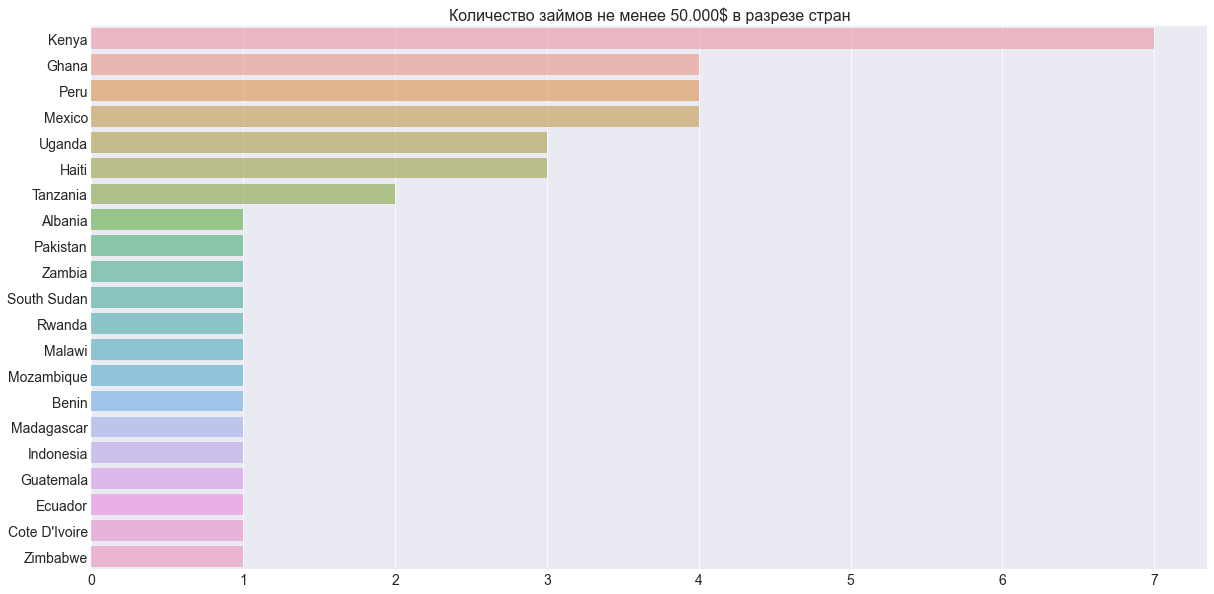

In [70]:
plt.figure(figsize=(20,10))
plt.title("Количество займов не менее 50.000$ в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=df_max_loans_countries.index, x=df_max_loans_countries.loan_amount.values, alpha=0.6)\
    .set(ylabel=None, xlabel=None)
plt.show()

Теперь посмотрим гендерный состав заёмщиков, которые брали займы с наибольшими суммами

In [71]:
df_max_loans_gender = df_max_loans[['country', 'loan_amount', 'borrower_genders']][~(df_max_loans['loan_amount'] < 50000)]\
    .groupby(['country', 'borrower_genders'])\
    .count()\
    .sort_values('loan_amount', ascending=False)\
    .reset_index()['borrower_genders']\
    .value_counts()
df_max_loans_gender

male      15
female    10
group      3
Name: borrower_genders, dtype: int64

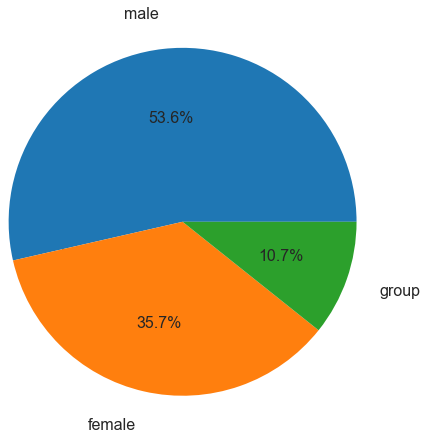

In [72]:
plot = df_max_loans_gender.plot.pie(fontsize=16, autopct='%1.1f%%', labeldistance=1.2, radius=2)

Как ни странно, но здесь мы набюдаем восстановление гендерного неравенства. Несмотря на то, что большинство заявок на платформе Kiva поступает от женщин, но заявок на займы с очень большими суммами больше - от мужчин

In [73]:
df_max_loans_gender = df_max_loans[['country', 'loan_amount', 'borrower_genders']][~(df_max_loans['loan_amount'] < 50000)]\
    .groupby(['country', 'borrower_genders'])\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack()\
    .fillna(0)['loan_amount']\
    .sort_values(by=['male', 'female', 'group'])
df_max_loans_gender = df_max_loans_gender[['male', 'female', 'group']]
df_max_loans_gender

borrower_genders,male,female,group
country,,,
Cote D'Ivoire,0.000000,100.000000,0.000000
Ecuador,0.000000,100.000000,0.000000
Mozambique,0.000000,100.000000,0.000000
Pakistan,0.000000,100.000000,0.000000
South Sudan,0.000000,100.000000,0.000000
Tanzania,0.000000,100.000000,0.000000
Haiti,33.333333,33.333333,33.333333
Mexico,50.000000,0.000000,50.000000
Peru,50.000000,0.000000,50.000000


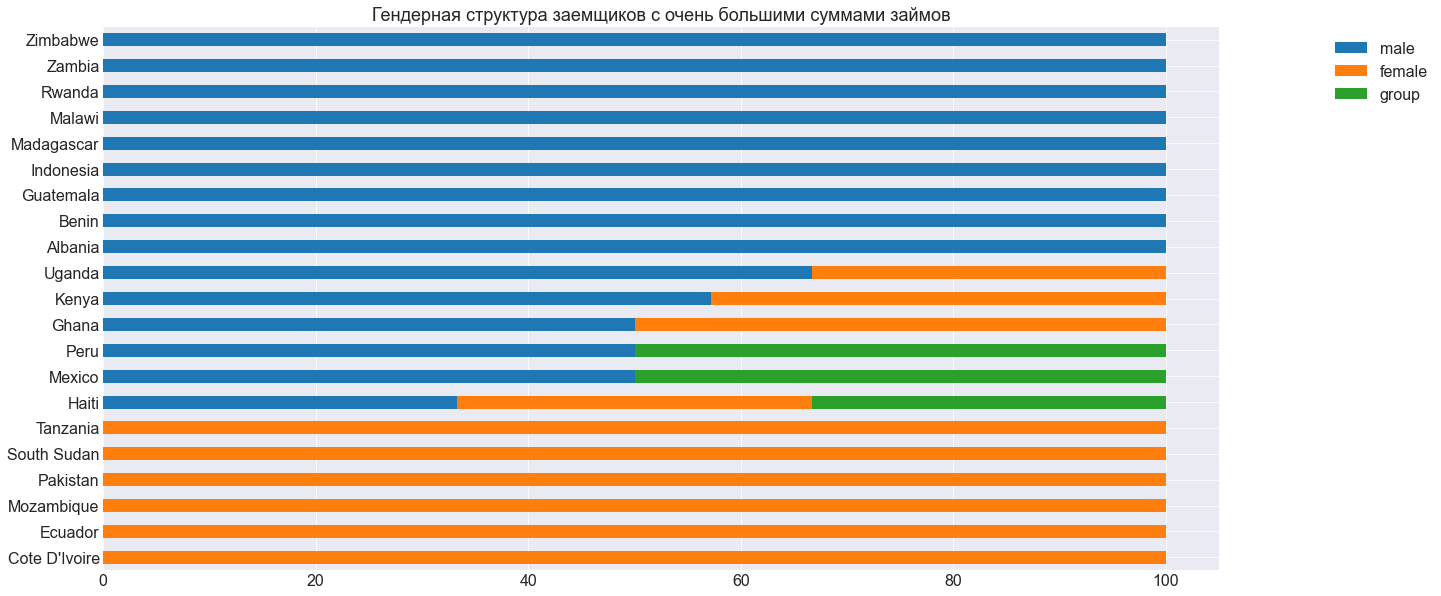

In [74]:
plot = df_max_loans_gender.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков c очень большими суммами займов')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

***

Давайте взглянем на средние и медианные значения суммы займа по секторам:

In [75]:
sector_mean_median = df_kiva_loans\
    .groupby(['sector'])['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)
sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


In [76]:
sort_order = sector_mean_median.index.to_list()
sort_order

['Wholesale',
 'Entertainment',
 'Education',
 'Health',
 'Construction',
 'Clothing',
 'Services',
 'Agriculture',
 'Housing',
 'Manufacturing',
 'Arts',
 'Food',
 'Transportation',
 'Retail',
 'Personal Use']

А также график, после того как мы избавимся от выбросов:

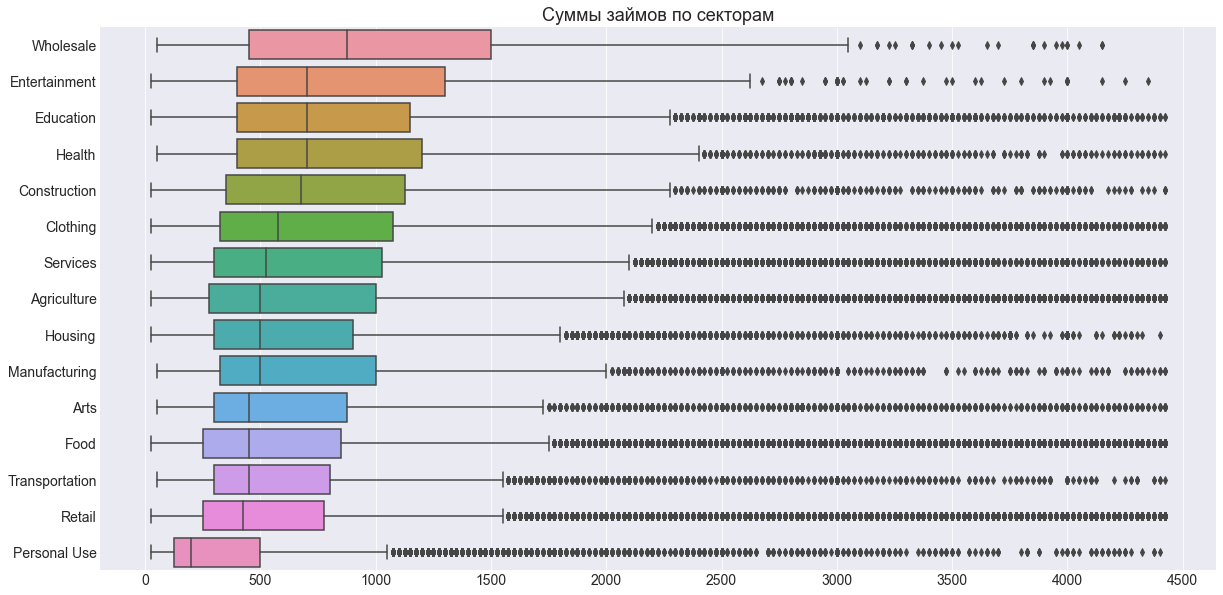

In [77]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

Прежде всего нужно отметить, что именно медиана даёт робастную (устойчивую к выбросам) оценку центрального положения суммы займа.

Из графика становится ясно, что медиана суммы заявок на **личные нужды** обладает наименьшим значением. Личные нужды включают предметы обихода и первой необходимости, обеспечение жилища энергией, теплом и водой. Именно эта группа заявок может свидетельствовать о случаях крайней нужды и бедности в различных странах.

На другой стороне графика сектора с самыми большими показателями медианы суммы займа: **оптовая торговля**, требующая значительнх затрат на закупку, что вполне логично; **образование** и **здравоохранение**, а также **сфера развлечений**.

### 2.4.3. Распределение по макрорегионам
***

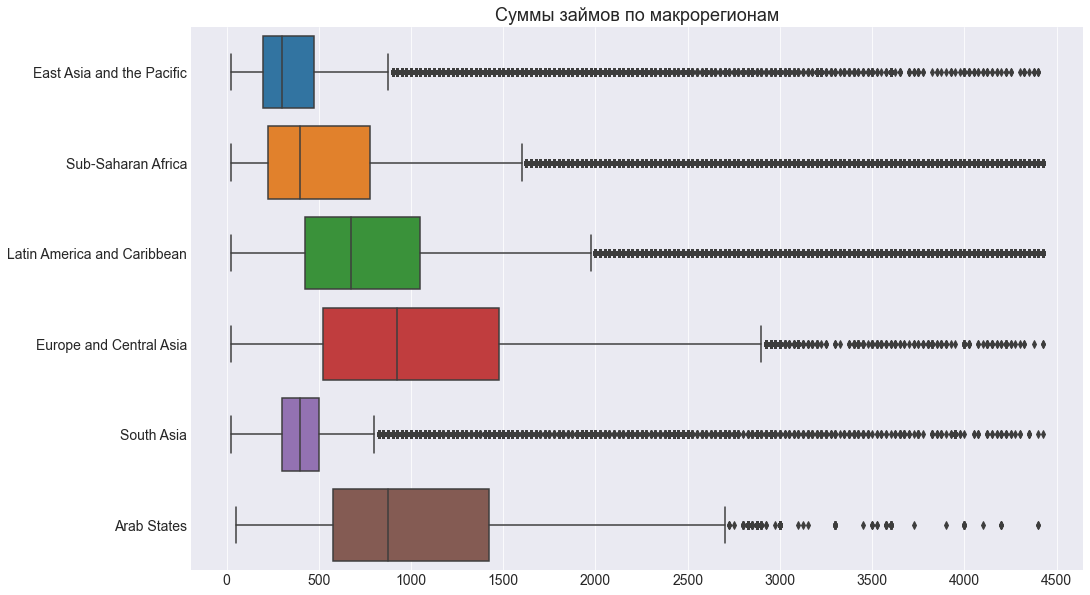

In [78]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

Регионы расположены в порядке убывания количества займов (в соответствии с графиком, полученным в п. 2.2.1).

Скорее всего, те регионы, в которых медианные значения ниже, в целом беднее и требуют финансирования короткими, небольшими, но частыми займами. Эту ситуацию мы и наблюдаем в регионе **Юго-Восточная Азия**, лидерами в котором являются **Филиппины** и **Камбоджа**.

Однако на этом графике мы можем заметить регион, который выбивается из последовательности, — **Южная Азия**, а в частности такие страны, как **Пакистан** и **Индия**. Вполне вероятно, что в этом регионе есть отличная площадка для расширения присутствия и поддержки со стороны сообщества Kiva.

`Вопрос для самостоятельной работы`

**Попробуйте найти связь между странами (макрорегионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных?**

Посмотрим на размеры минимальных, медианных, средних, максимальных вкладова, а также их количество в разрезе регионов и гендера заёмщиков

In [79]:
df_kiva_loans[['loan_amount', 'world_region', 'borrower_genders']]\
    .groupby(['world_region', 'borrower_genders'])\
    .agg(['min', 'median', 'mean', 'max', 'count'])\
    .unstack()

loan_amount                                        \
                                    min                median                   
borrower_genders                 female  group   male  female   group    male   
world_region                                                                    
Arab States                        75.0  200.0   50.0  1000.0   950.0   750.0   
East Asia and the Pacific          25.0   25.0   25.0   300.0   200.0   450.0   
Europe and Central Asia            25.0   50.0   25.0   900.0  1000.0  1000.0   
Latin America and Caribbean        50.0   25.0   50.0   625.0  1950.0   600.0   
South Asia                         25.0  125.0  150.0   375.0   825.0  1050.0   
Sub-Saharan Africa                 25.0   25.0   25.0   300.0  1050.0   350.0   

                                                                              \
                                    mean                                 max   
borrower_genders                  female        group         male    female   
world_region                                                                   
Arab States                  1114.963973  1490.513552  1048.435496   20000.0   
East Asia and the Pacific     379.300860   522.478799   659.159296   32000.0   
Europe and Central Asia      1072.917728  1519.776119  1121.870266    8000.0   
Latin America and Caribbean   747.171034  2453.776193   784.077477  100000.0   
South Asia                    404.360997  1252.996319  1273.314108   50000.0   
Sub-Saharan Africa            407.665787  1593.107051   545.619103   50000.0   

                                                                     
                                                count                
borrower_genders               group     male  female  group   male  
world_region                                                         
Arab States                   9325.0  13975.0    3886   1402   3899  
East Asia and the Pacific    20000.0  50000.0  165868  28419  12662  
Europe and Central Asia      16675.0  50000.0   27470    134  11223  
Latin America and Caribbean  50000.0  50000.0   71740  17180  44839  
South Asia                   10000.0  12925.0   33341   4347   1127  
Sub-Saharan Africa           40000.0  50000.0   85275  35656  41972

А теперь построим график распределений по суммам займов

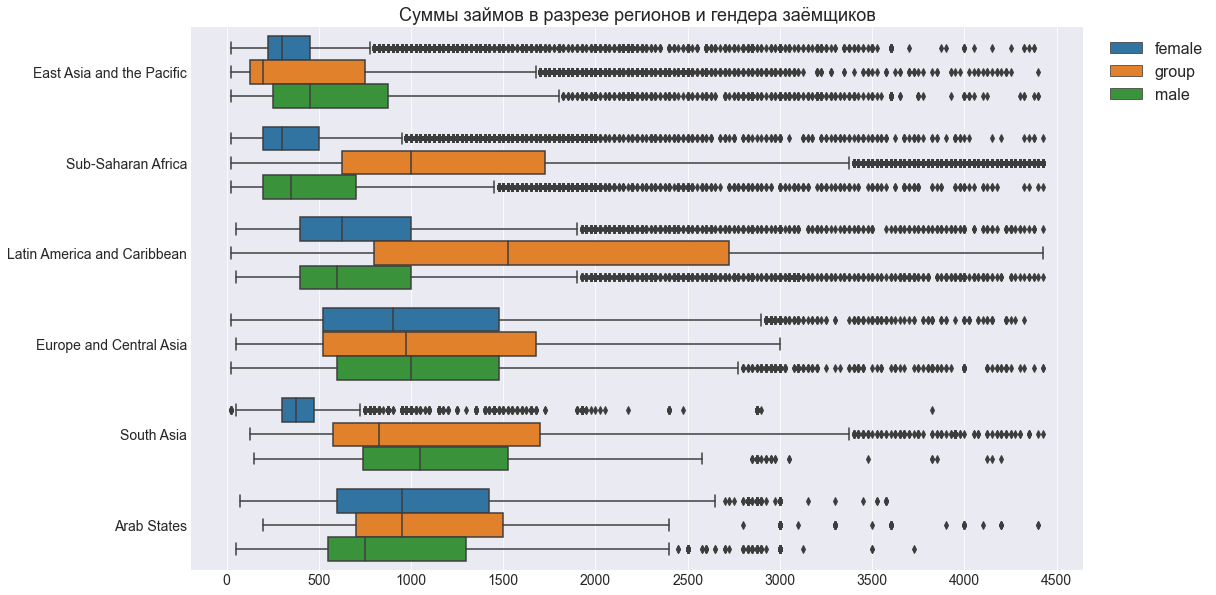

In [80]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов в разрезе регионов и гендера заёмщиков", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='world_region', hue='borrower_genders', order=regions_list, hue_order=['female', 'group', 'male'], data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
    
plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

И количеству займов

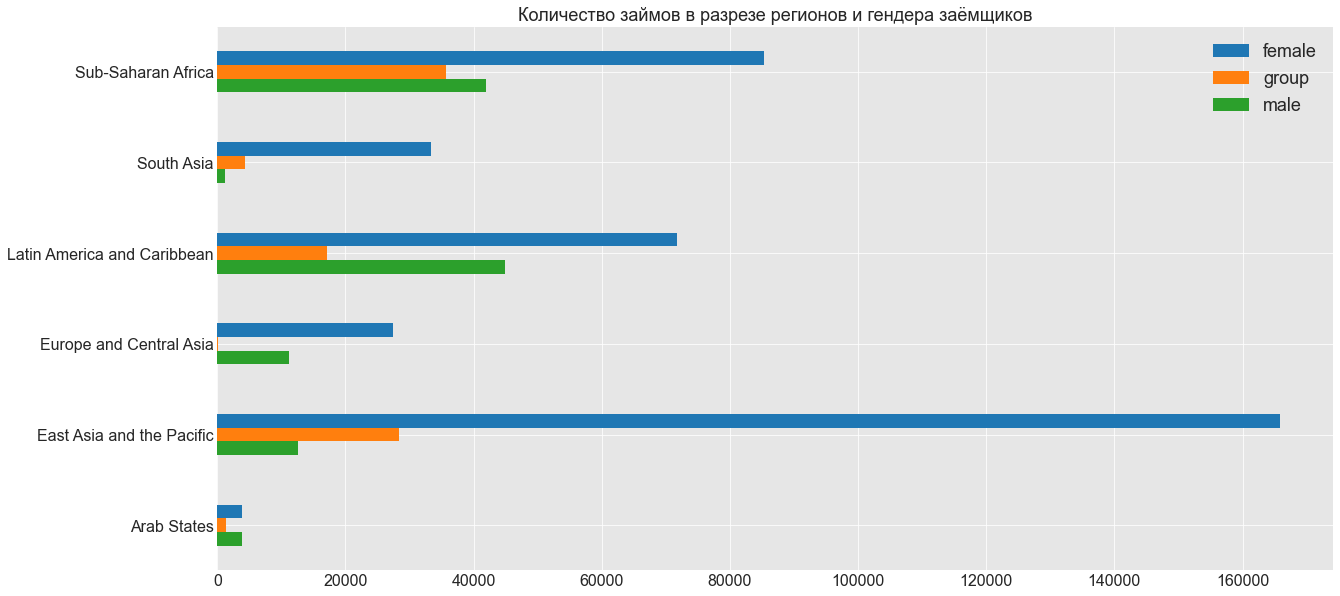

In [81]:
plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.asarray(range(6))
width = 0.15
i = -5
for gender, group in df_kiva_loans[['loan_amount', 'world_region', 'borrower_genders']].groupby(['borrower_genders']):
    plt.barh(x - i * width, group.groupby('world_region')['loan_amount'].count().values, width, label = gender)
    i += 1
plt.title('Количество займов в разрезе регионов и гендера заёмщиков', fontsize=18)
plt.yticks(x + 0.6, list(df_kiva_loans[['loan_amount', 'world_region', 'borrower_genders']].groupby(['world_region']).groups.keys()), fontsize=16)
plt.xticks(fontsize=16)
ax.set_facecolor('.9')
plt.legend(prop={'size': 18})
plt.grid(color='white')
plt.show()

Здесь видна следующая взаимосвязь между регионом, полом заёмщиков и суммами займа: наибльшие займы по сумме были сделаны **группами людей** в **Латинской Америке**, в то время как женщины и мужчины берут примерно одинаковые суммы; тоже самое можно сказать про **Африканские страны**, но в этих регионах **количество займов сделанных жещинами в два раза превышает количество займов сделанных мужчинами**. В **Европейских странах мужчины** берут займы на **бОльшие суммы**, чем женщины, однако **женщины делают в 2,5 раза больше заявок**. В **Арабских странах количество заявок** от мужчин и женщин **примерно одинковое**, но **жещины берут займы на бОльшие суммы чем мужчины**. Что касается **Южной Азии** (это такие страны как Индия и Пакистан), то здесь наблюдается **колоссальная разница в количестве заявок: от женщин заявок более чем в 30 раз больше, чем от мужчин**, но при этом **мужчины берут займы на суммы, в три раза превышающие суммы займов от женщин**. Похожая ситуация наблюдается и со странами **Юго-Восточной Азии - мужчины берут займы на суммы, в полтора раза превышающие суммы займов женщин**, но при это суммы эти относительно небольшие - в среднем 300-450$ (медианные значения), но надо отметить, что в данном регионе сделано **больше всего займов** и **подавляющее большинство** из них - **займы от женщин**, которых на порядок больше чем займов от мужчин.

## 2.5. Время ожидания средств
***

Итак, мы увидели, где Kiva наиболее популярна, типы деятельности и заёмщиков, которые нуждаются в деньгах, а также сколько денег они обычно просят. Отлично!

Следующий интересный вопрос, который мы можем задать: как долго им действительно приходится ждать финансирования? К счастью, у нас есть две колонки, которые помогут нам в исследовании:

* **posted_time**: соответствует дате + точный час, когда заявка появилась на сайте.
* **disbursed_time**: соответствует дате + точный час, когда деньги фактически были получены адресатом.

1. Отбрасываем строки с пропущенными значениями для «disbursed_time», получаем столбцы в правильном формате.
2. Вычисляем интервал между датами.
3. Исключим из рассмотрения заявки, для которых деньги сначала фактически выдаются агентами на местах и только потом публикуются на сайте.

In [82]:
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)
df_loans_dates

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671166,1340251,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-22 12:51:42+00:00,13.0,1,NaN,female,monthly,2017-07-21,KEN,Sub-Saharan Africa,0.209375
671170,1340267,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,PK,Pakistan,Attock,PKR,...,2017-07-22 13:07:29+00:00,13.0,1,NaN,female,monthly,2017-07-21,PAK,South Asia,0.233167
671177,1340279,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-24 12:44:16+00:00,13.0,1,NaN,female,monthly,2017-07-22,KEN,Sub-Saharan Africa,0.209375
671186,1340300,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,2017-07-25 00:19:01+00:00,13.0,1,NaN,female,monthly,2017-07-24,NaN,NaN,NaN


In [83]:
# dates columns:
dates = ['posted_time','disbursed_time']
dates

['posted_time', 'disbursed_time']

In [84]:
# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates]

C:\Users\greym\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,posted_time,disbursed_time
0,2014-01-01 06:12:39,2013-12-17 08:00:00
1,2014-01-01 06:51:08,2013-12-17 08:00:00
2,2014-01-01 09:58:07,2013-12-17 08:00:00
3,2014-01-01 08:03:11,2013-12-24 08:00:00
4,2014-01-01 11:53:19,2013-12-17 08:00:00
...,...,...
671166,2017-07-21 06:36:35,2017-07-20 07:00:00
671170,2017-07-21 21:46:10,2017-07-21 07:00:00
671177,2017-07-22 06:04:07,2017-07-21 07:00:00
671186,2017-07-24 08:09:10,2017-07-24 07:00:00


In [85]:
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)
df_loans_dates[dates]

C:\Users\greym\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,posted_time,disbursed_time
0,2014-01-01 06:12:39,2013-12-17 08:00:00
1,2014-01-01 06:51:08,2013-12-17 08:00:00
2,2014-01-01 09:58:07,2013-12-17 08:00:00
3,2014-01-01 08:03:11,2013-12-24 08:00:00
4,2014-01-01 11:53:19,2013-12-17 08:00:00
...,...,...
671166,2017-07-21 06:36:35,2017-07-20 07:00:00
671170,2017-07-21 21:46:10,2017-07-21 07:00:00
671177,2017-07-22 06:04:07,2017-07-21 07:00:00
671186,2017-07-24 08:09:10,2017-07-24 07:00:00


In [86]:
# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates['time_funding']

C:\Users\greym\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\greym\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0        -15 days +01:47:21
1        -15 days +01:08:52
2        -16 days +22:01:53
3         -9 days +23:56:49
4        -16 days +20:06:41
                ...        
671166    -1 days +00:23:25
671170    -1 days +09:13:50
671177    -1 days +00:55:53
671186    -1 days +22:50:50
671201    -1 days +00:45:52
Name: time_funding, Length: 609773, dtype: timedelta64[ns]

In [87]:
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1)
df_loans_dates['time_funding']

0        -14.925451
1        -14.952176
2        -15.082025
3         -8.002211
4        -15.162025
            ...    
671166    -0.983738
671170    -0.615394
671177    -0.961192
671186    -0.048032
671201    -0.968148
Name: time_funding, Length: 609773, dtype: float64

In [88]:
# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()

In [89]:
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]
df_loans_dates_trimmed

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,time_funding
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,KEN,Sub-Saharan Africa,0.209375,28.650336
62,653290,4275.0,4275.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,14.0,144,"user_favorite, #Low-profit FP, #Post-disbursed...",group,bullet,2014-01-02,NaN,NaN,NaN,24.866169
67,1080150,125.0,125.0,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,...,3.0,6,NaN,male,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.703970
114,1080151,125.0,125.0,Energy,Services,buy solar lanterns for sale.,KE,Kenya,NaN,KES,...,3.0,7,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.624109
195,1080149,125.0,125.0,Grocery Store,Food,ncrease my yams stock for sales,KE,Kenya,NaN,KES,...,3.0,6,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,19.566435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668656,1334144,2000.0,2000.0,Weaving,Arts,to increase the physical space of her workshop...,MX,Mexico,Oaxaca,USD,...,13.0,59,"volunteer_pick, #Repeat Borrower, #Biz Durable...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.570625
668705,1334000,125.0,125.0,Farming,Agriculture,to purchase improved farm inputs that will inc...,NG,Nigeria,Kaduna,NGN,...,19.0,5,"#Vegan, #Parent, #Schooling",male,bullet,2017-07-05,NGA,Sub-Saharan Africa,0.258811,6.782963
668763,1333718,300.0,300.0,Farming,Agriculture,purchase fertilizers.,UG,Uganda,Ishaka,UGX,...,7.0,8,#Elderly,male,monthly,2017-07-05,UGA,Sub-Saharan Africa,0.375300,9.942708
668921,1334147,1900.0,1900.0,Crafts,Arts,"to purchase raw materials (wool, dyes and fire...",MX,Mexico,Oaxaca,USD,...,13.0,62,"#Repeat Borrower, #Unique, #Fabrics, #Job Crea...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.568808


### 2.5.1. Количество дней до полного финансирования заявки
***

Отлично! Мы получили расчётную величину.
Теперь построим график распределения количества дней до полного финансирования заявки:

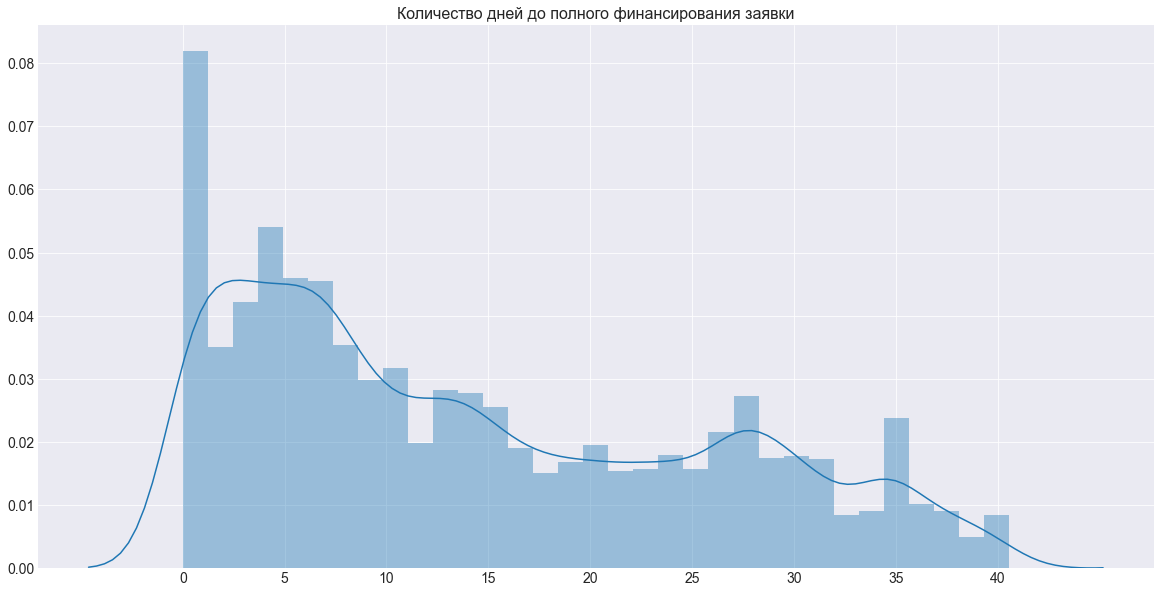

In [90]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

БОльшая часть заявок финансируется в течение 10 дней.

Однако также очевидно и наличие пиков в районе 27, 35 дней. Это уже может свидетельствовать о том, что часть заявок проходят довольно длительный процесс 
финансирования.

### 2.5.2. Время ожидания и суммы займов 
***

Для визуализации зависимости суммы займа и временного интервала финансирования давайте построим **тепловую карту**:

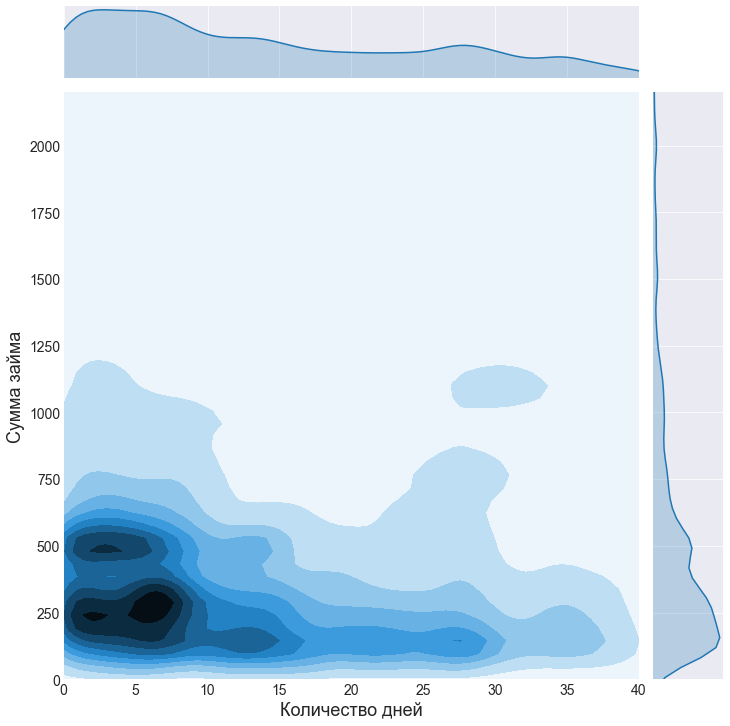

In [91]:
p = sns.jointplot(x="time_funding", y="loan_amount", data=df_loans_dates_trimmed, kind='kde', height=10, ratio=7, xlim=[0,40] , ylim=[0,2200])\
        .set_axis_labels("Количество дней", "Сумма займа", size=18)

# p.ax_joint.set_xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
# p.ax_joint.set_yticks(np.arange(0, max(df_loans_dates_trimmed['loan_amount']+1), 250))
p.ax_joint.tick_params(labelsize=14)

plt.show()

На тепловой карте области, выделенные одним цветом, содержат одинаковое количестчо заявок. При этом области с более насыщенными, тёмными цветами содержат бОльшее количество заявок, чем более светлые области.

Действительно, возрастающее количество дней, требуемое для финансирования заявки, можно объяснить возрастающей суммой, но только отчасти.

Мы также можем видеть наличие большого количества заявок на суммы до **$250** со сроками **20–35** дней.
Kiva явно может предпринять что-то, чтобы люди чаще обращали внимание на такие заявки.

### 2.5.3. Время ожидания и страны
***

Давайте попробуем проверить наличие смещения интервалов ожидания по странам, то есть предположение о том, что заявки из ряда стран финансируются необоснованно долго в силу тех или иных причин.

In [92]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()
df_country_median

,world_region,country,loan_amount,time_funding,term_in_months
0,Arab States,Egypt,650.0,3.754387,14.0
1,Arab States,Iraq,3000.0,5.441968,11.0
2,Arab States,Jordan,1200.0,12.992986,18.0
3,Arab States,Somalia,1050.0,22.496071,14.0
4,Arab States,Yemen,475.0,13.994259,14.0
5,East Asia and the Pacific,Cambodia,500.0,15.461314,19.5
6,East Asia and the Pacific,China,2475.0,0.041343,13.0
7,East Asia and the Pacific,Indonesia,1000.0,19.935359,10.0
8,East Asia and the Pacific,Lao People's Democratic Republic,575.0,8.951424,10.0
9,East Asia and the Pacific,Mongolia,1987.5,21.236632,20.0


In [93]:
df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding') # убираем те страны, которых нету в списке (менее 5% соощества Kiva)
df_country_median

,world_region,country,loan_amount,time_funding,term_in_months
42,Sub-Saharan Africa,Madagascar,775.0,0.026262,10.0
41,Sub-Saharan Africa,Liberia,775.0,0.680903,14.0
53,Sub-Saharan Africa,Togo,275.0,2.788854,9.0
10,East Asia and the Pacific,Philippines,375.0,4.071389,10.0
56,Sub-Saharan Africa,Zimbabwe,500.0,5.655365,8.0
48,Sub-Saharan Africa,Rwanda,1600.0,5.888854,8.0
26,Latin America and Caribbean,Haiti,325.0,6.710608,71.0
34,South Asia,Pakistan,450.0,8.999288,13.0
40,Sub-Saharan Africa,Kenya,325.0,9.000480,11.0
17,Europe and Central Asia,Tajikistan,500.0,9.428015,13.0


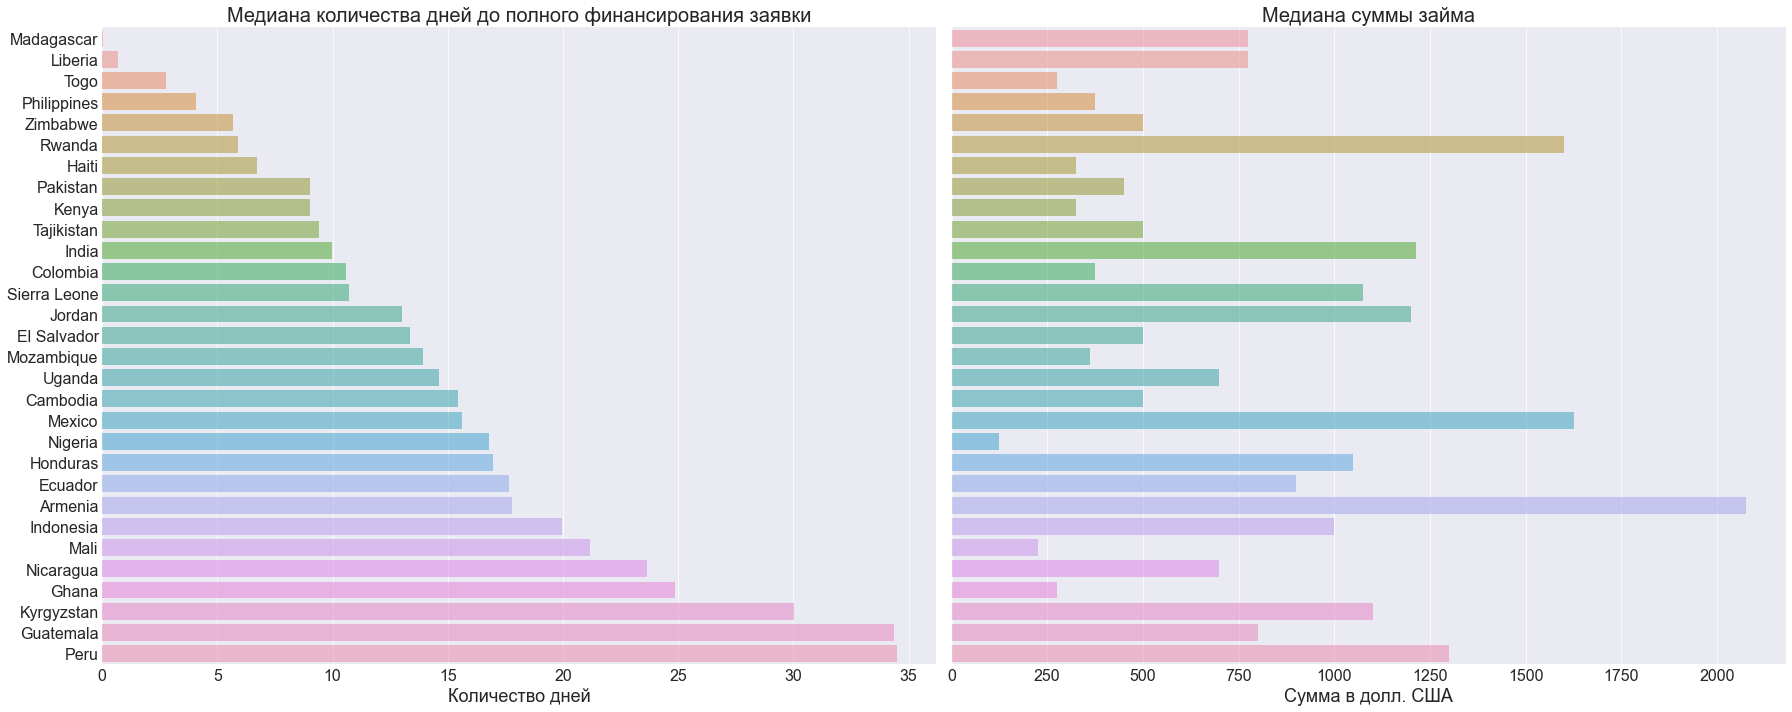

In [94]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана количества дней до полного финансирования заявки", fontsize=20)
ax[0].set_xlabel('Количество дней', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Действительно, прямой связи времени ожидания финансирования и суммой займа не наблюдается.

В ряде стран с довольно большой медианной суммой займа наблюдаются короткие интервалы на сбор средств:

- Либерия: **750** USD — **1** день;
- Руанда: **1600** USD — **5** дней;
- Индия: **1250** USD — **10** дней.

И наоборот, в нескольких странах на сбор относительно небольших сумм требуется длительное время:

- Нигерия: **125** USD — **17** дней;
- Мали: **250** USD — **22** дня;
- Гана: **250** USD — **25** дней.

Уверен, что в силах организаторов платформы Kiva и сообщества сглаживать такие явные неравенства.

## 2.6. Сумма кредита и время погашения
***

У нас есть ещё один интересный разрез датасета — это информация о количестве месяцев, необходимых заёмщикам для погашения своих кредитов.

Простое построение среднего/медианного времени погашения по стране может дать некоторую информацию, однако она может ввести в заблуждение.

Действительно, скажем, в стране **А** кредиты погашаются в среднем через **12** месяцев, а в стране **В** — через 15 месяцев. Ориентируясь на это, можно сказать, что людям в стране **B** в среднем нужно больше времени, чтобы погасить свои кредиты, по сравнению с людьми в стране **A**. 

Теперь давайте предположим, что средняя сумма кредитов в стране **A** составляет **500** долларов, тогда как в стране **B** это **800** долларов, тогда это означает, что люди в стране **А** платят **41,66** в месяц, в то время как люди в стране **B** платят **51,33**  в месяц!

Поэтому более важно **соотношение суммы кредита и времени погашения**. Оно даёт представление о том, сколько денег в месяц человек в данной стране может позволить себе тратить на погашение кредитов.

Теперь рассчитаем сумму ежемесячного платежа в разрезе стран:

In [95]:
df_country_median = df_country_median.sort_values(by='term_in_months')
df_country_median

,world_region,country,loan_amount,time_funding,term_in_months
44,Sub-Saharan Africa,Mali,225.0,21.173565,5.0
21,Latin America and Caribbean,Colombia,375.0,10.581377,6.0
56,Sub-Saharan Africa,Zimbabwe,500.0,5.655365,8.0
48,Sub-Saharan Africa,Rwanda,1600.0,5.888854,8.0
45,Sub-Saharan Africa,Mozambique,362.5,13.939491,8.0
53,Sub-Saharan Africa,Togo,275.0,2.788854,9.0
50,Sub-Saharan Africa,Sierra Leone,1075.0,10.731603,9.0
42,Sub-Saharan Africa,Madagascar,775.0,0.026262,10.0
7,East Asia and the Pacific,Indonesia,1000.0,19.935359,10.0
30,Latin America and Caribbean,Peru,1300.0,34.472743,10.0


In [96]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']
df_country_median

,world_region,country,loan_amount,time_funding,term_in_months,monthly_repayment
44,Sub-Saharan Africa,Mali,225.0,21.173565,5.0,45.000000
21,Latin America and Caribbean,Colombia,375.0,10.581377,6.0,62.500000
56,Sub-Saharan Africa,Zimbabwe,500.0,5.655365,8.0,62.500000
48,Sub-Saharan Africa,Rwanda,1600.0,5.888854,8.0,200.000000
45,Sub-Saharan Africa,Mozambique,362.5,13.939491,8.0,45.312500
53,Sub-Saharan Africa,Togo,275.0,2.788854,9.0,30.555556
50,Sub-Saharan Africa,Sierra Leone,1075.0,10.731603,9.0,119.444444
42,Sub-Saharan Africa,Madagascar,775.0,0.026262,10.0,77.500000
7,East Asia and the Pacific,Indonesia,1000.0,19.935359,10.0,100.000000
30,Latin America and Caribbean,Peru,1300.0,34.472743,10.0,130.000000


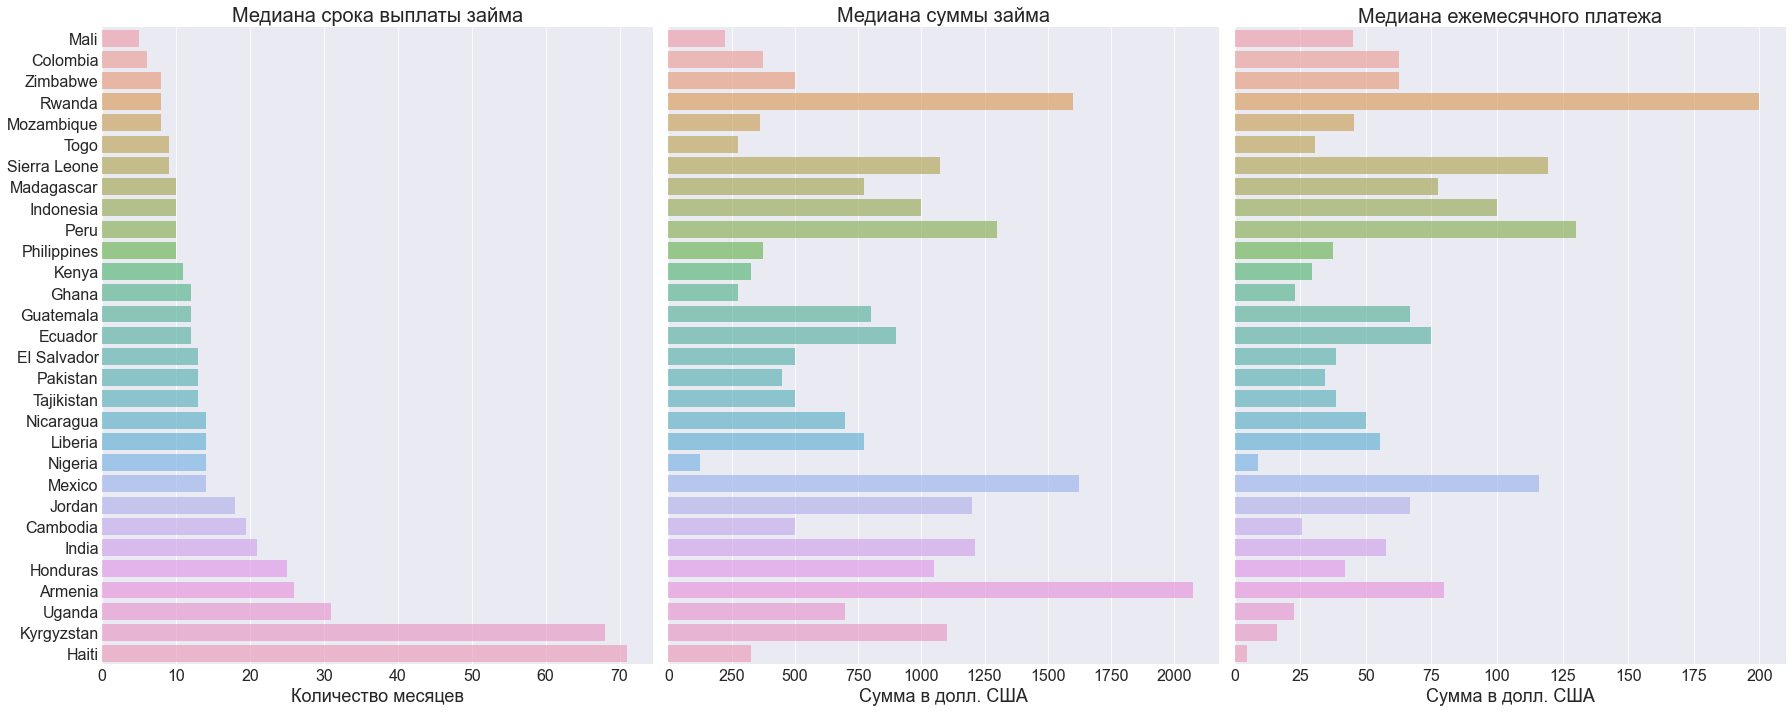

In [97]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Перед нами наглядное представление о рейтинге беднейших стран, люди из которых пользуются платформой Kiva. Это страны, в которых люди могут позволить себе выплачивать суммы значительно меньшие, чем в других странах, — а значит, и уровень бедности там выше.

- Гаити;
- Нигерия;
- Киргизия;
- Уганда;
- Гана.

Как никогда стоит обратить внимание сообщества Kiva и направить усилия на поддержку самых нуждающихся!

# 3. Результаты и выводы
***

* Важнейшая **роль площадки Kiva** и её соощества для многих стран
* Явное **наличие неравенства** среди стран и регионов планеты. Разные показатели уровня бедности и благосостояния населения
* Использование **небольших по сумме** и **коротких по сроку погашения** займов в ряде стран: Филиппины, Камбоджа
* Наличие стран и регионов с нарушением **гендерного баланса** заёмщиков
* Большое количество заявок в **сырьевых, непроизводственных секторах** и **сфере услуг**
* Высокая доля заявок, направленных на удовлетворение самых **базовых человеческих потребностей** в ряде стран
* Наличие коллективных заявок на **долгосрочные проекты** с привлечением крупных сумм
* Ниское проникновение Kiva в ряде регионов и стран, таких как **Южная Азия** и, в частности, **Пакистан** и **Индия**
* Нередки случаи **проявления неравенства между странами:** длительные ожидания финансировния для части заявок с совсем небольшими суммами
***

Пора подвести основные итоги и сделать выводы, которые могут быть полезны и интересны не только организаторам платформы Kiva, но и всему сообществу неравнодушных людей, которые стремятся сделать этот мир немного лучше.

- Прежде всего необходимо отметить очень важную и знаменательную роль площадки Kiva и её сообщества. Для большого числа людей в совершенно разных частях нашей планеты Kiva играет важнейшую роль в части **поддержки операционной и хозяйственной деятельности**, активно дополняя, а часто выступая в роли частного банковского сектора.
- В каждый момент времени стоит оказывать **адресную помощь** странам и регионам, которые больше всего **недофинансированы** относительно других. Это страны с высоким уровнем бедности, в которых люди могут позволить себе выплачивать суммы значительно мЕньшие, чем в других странах. Как никогда стоит обратить внимание сообщества Kiva и направить усилия на **поддержку самых нуждающихся**! Такие заявки могут быть отражены в отдельных категориях и включать призывы в свои заголовки: *Неотложные нужды, Срочно, Истекает срок финансирования*.
- Используя положительный опыт Филиппин, стоит стимулировать рост выдачи небольших по сумме и сроку погашения займов, которые обеспечат **бОльшую занятость** населения и рост **деловой активности**. По возможности, стоит делить заявки из небогатых стран на небольшие и короткие займы, каждый из которых будет очередным маленьким шагом в большом деле.
- Когда дело касается возможностей для развития человека — границы между мужчинами и женщинами стираются. Стоит стремиться к обеспечению доступа к финансированию для **женщин и мужчин в равной степени** и обратить внимание на те страны и регионы, где пока этот баланс нарушен. Например, для таких стран, как Самоа, Либерия, Того, выводить на главную страницу сначала займы от мужчин. Отличным шагом станет публикация личных историй и примеров женщин и мужчин, например, в **интернет-издательствах**, на **блогинг-платформах**, таких как medium.com, а также в видеоблоге Kiva на youtube.com.
- Приоритетными должны становиться заявки, направленные на развитие отраслей с **высокой добавленной стоимостью и стимулированием производств**, так как они являются движущей силой и по цепочке начинают задействовать другие отрасли. А именно **строительство, производство, лёгкая промышленность**. Здесь очень кстати будет использование **умных рекомендательных систем** на сайте  Kiva.org, которые с бОльшей вероятностью будут подсказывать такие заявки.
- Всё ещё довольна высока доля заявок, направленных на удовлетворение самых **базовых человеческих потребностей**. Такие просьбы не должны оставаться незамеченными, но быть первыми кандидатами на главной странице. Недопустимы такие ситуации, когда, например, в Нигерии люди ждут жизненно важную чистую воду по 10 дней. Дайджест таких заявок можно включать в **регулярные почтовые рассылки** всем участникам сообщества Kiva, когда-либо принимавшим участие в финансировании проектов.
- Финансирование заявок на **крупные суммы** и **долгосрочные проекты** тоже работает. Для части стран возможность использовать Kiva будет играть решающую роль в формировании и реализации инфраструктурных и системообразующих проектов.
- Для ряда регионов и стран присутствия, таких как **Южная Азия**, в частности **Пакистан** и **Индия**, есть отличные перспективы для расширения присутствия и деятельности со стороны сообщества Kiva.
- Нередки случаи **проявлений неравенства между странами**, таких как, например, длительные ожидания финансирования для части заявок с совсем небольшими суммами. Мы уверены, что в силах организаторов платформы Kiva и сообщества **сглаживать такие явные неравенства**, регулируя результаты поисковой выдачи, наполнение рассылок и рекомендуемых заявок для участников сообщества.

# 4. Домашнее задание
***

## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

#### **Ответы по данным пунктам Д/З см. в соответствующих пунктах по тексту выше ☝☝☝**
***

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count) на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Взаимозависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж» в разрезе **макрорегионов**.

### Зависимость пола заёмщика от региона планеты, сектора экономики

In [98]:
gender_region_sector = df_kiva_loans_trimmed[['world_region', 'sector', 'borrower_genders']]\
    .groupby(['borrower_genders', 'world_region', 'sector'])\
    .size()\
    .reset_index()\
    .fillna(0)
gender_region_sector.columns = list(gender_region_sector.columns[:-1]) + ['amount_by_gender']

In [99]:
gender_region_sector

,borrower_genders,world_region,sector,amount_by_gender
0,female,Arab States,Agriculture,455
1,female,Arab States,Arts,116
2,female,Arab States,Clothing,441
3,female,Arab States,Construction,17
4,female,Arab States,Education,1106
...,...,...,...,...
259,male,Sub-Saharan Africa,Personal Use,3381
260,male,Sub-Saharan Africa,Retail,5699
261,male,Sub-Saharan Africa,Services,2463
262,male,Sub-Saharan Africa,Transportation,2088


В датафрейме получился очень большой разброс значений, что приведёт к неочень информативному оторажению информации на графике, поэтому логарифмируем значения

In [100]:
by_gender_region = gender_region_sector.groupby(['world_region', 'borrower_genders']).sum().reset_index()
by_gender_region['amount_by_gender_log'] = np.log(by_gender_region['amount_by_gender'])

In [101]:
by_gender_sector = gender_region_sector.groupby(['sector', 'borrower_genders']).sum().reset_index()
by_gender_sector['amount_by_gender_log'] = np.log(by_gender_sector['amount_by_gender'])

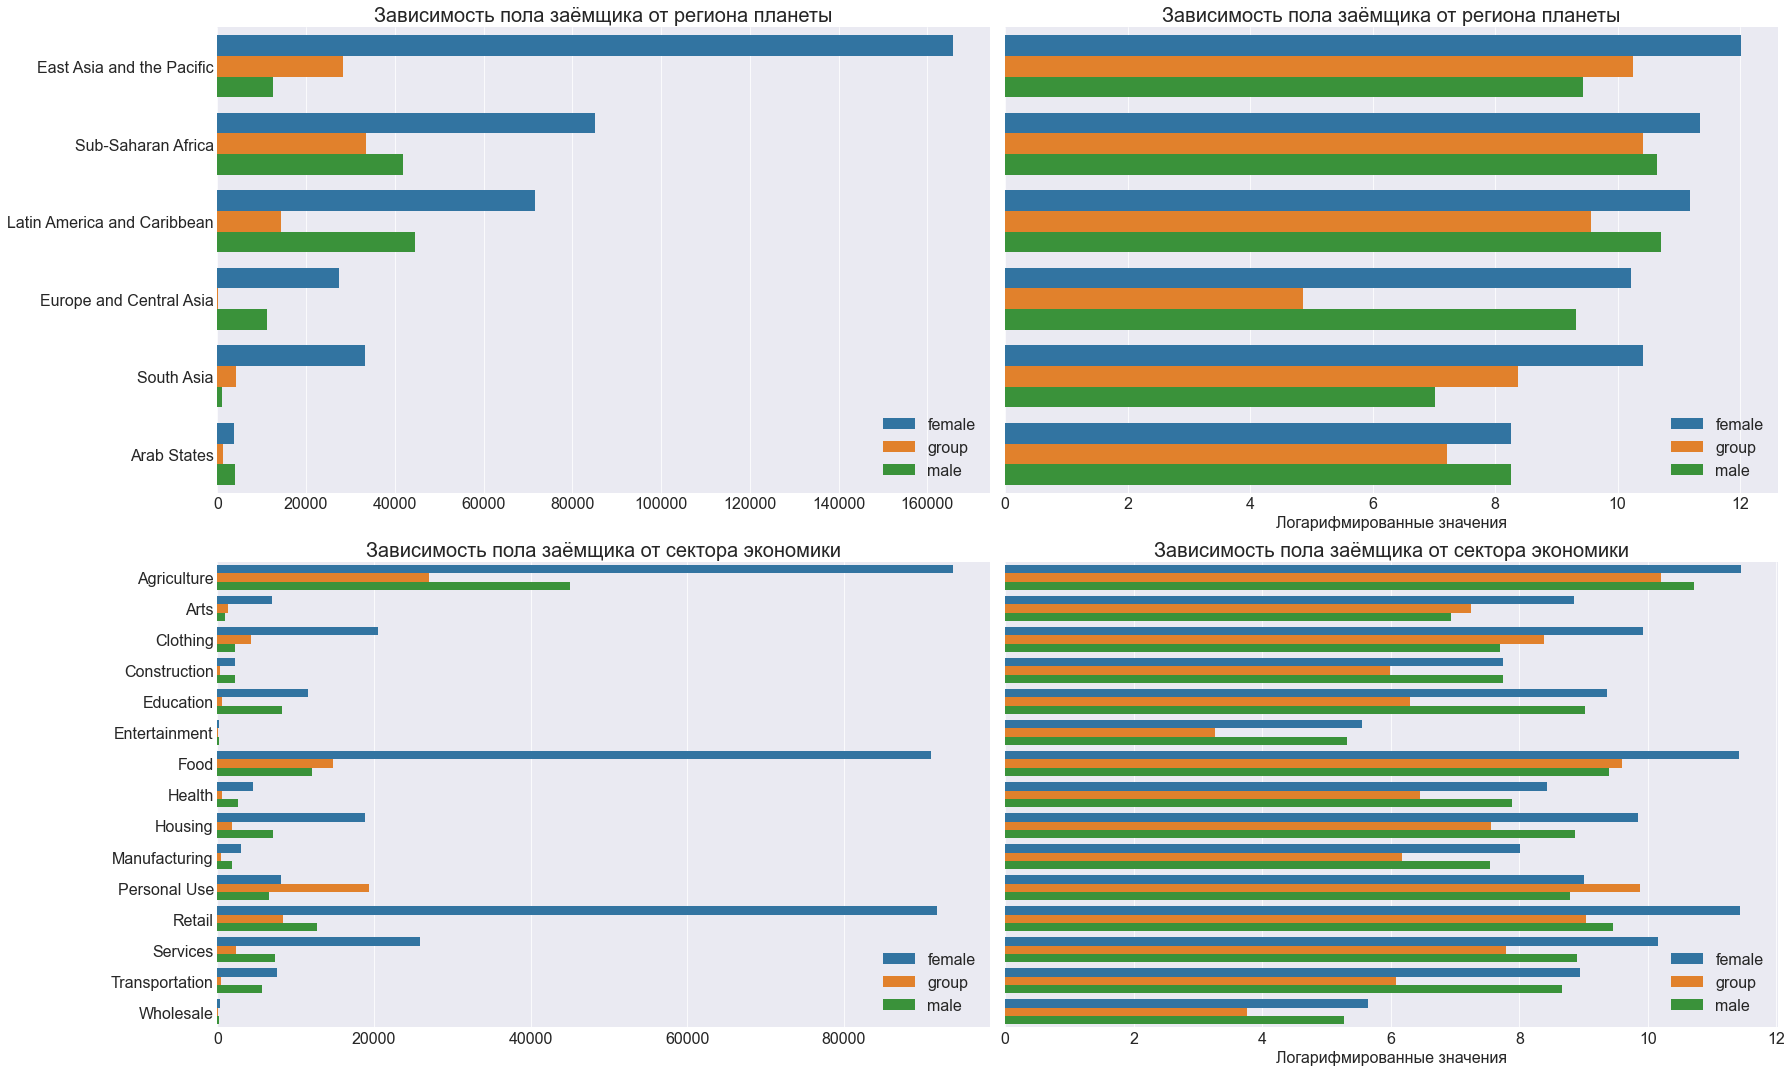

In [102]:
fig, axes = plt.subplots(2, 2, sharey='row', figsize=(25,15))

sns.barplot(x='amount_by_gender', y='world_region', hue='borrower_genders', order=regions_list, hue_order=['female', 'group', 'male'], data=by_gender_region, ax=axes[0,0])
axes[0,0].set_title("Зависимость пола заёмщика от региона планеты", fontsize=20)
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].tick_params(labelsize=16)
axes[0,0].legend(loc=4, bbox_to_anchor=(1, 0), fontsize=16)

sns.barplot(x='amount_by_gender_log', y='world_region', hue='borrower_genders', order=regions_list, hue_order=['female', 'group', 'male'], data=by_gender_region, ax=axes[0,1])
axes[0,1].set_title("Зависимость пола заёмщика от региона планеты", fontsize=20)
axes[0,1].set_xlabel('Логарифмированные значения', fontsize=16)
axes[0,1].set_ylabel(None)
axes[0,1].tick_params(labelsize=16)
axes[0,1].legend(loc=4, bbox_to_anchor=(1, 0), fontsize=16)

sns.barplot(x='amount_by_gender', y='sector', hue='borrower_genders', hue_order=['female', 'group', 'male'], data=by_gender_sector, ax=axes[1,0])
axes[1,0].set_title("Зависимость пола заёмщика от сектора экономики", fontsize=20)
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].tick_params(labelsize=16)
axes[1,0].legend(loc=4, bbox_to_anchor=(1, 0), fontsize=16)

sns.barplot(x='amount_by_gender_log', y='sector', hue='borrower_genders', hue_order=['female', 'group', 'male'], data=by_gender_sector, ax=axes[1,1])
axes[1,1].set_title("Зависимость пола заёмщика от сектора экономики", fontsize=20)
axes[1,1].set_xlabel('Логарифмированные значения', fontsize=16)
axes[1,1].set_ylabel(None)
axes[1,1].tick_params(labelsize=16)
axes[1,1].legend(loc=4, bbox_to_anchor=(1, 0), fontsize=16)

plt.tight_layout()
plt.show()

Мы видим, что в разрезе регионов планеты, **более чем в 30 раз** чаще оставляют заявки **женщины** в старнах **Южной Азии**, то же можно сказать и о **Юго-Восточной Азии**, но там и **рекордное количество заявок** - и они **от женщин**. А вот в **Арабских странах мужчины** берут займы чаще женщин, хотя общее количество заявок от обоих полов там незначительно.
А в разрезе секторов экономики, во всех сферах заявот от мужчин меньше чем от женщин, во многих секторах - во много раз. Тут можно выделить такие сферы как **розничная торговля**,  **пищевая промышленность**, **сельское хозяйство**мужчин в **оптовой торговле**, **транспортных услугах**, и **услугах развлечения**. В остальных же секторах больше преобладание женщин, - особенно в таких сферах как **продажа одежды**, **продукты питания**, **ритэйл** и **сфера услуг**. Как ни странно, но даже в таком секторе как **строительство** - также преимущество за женщинами.

### Влияние такого атрибута займа, как **Количество кредиторов** (lender_count) на суммы и сроки займов.

Для начала посмотрим на распределение количества кредиторов по гисторгамме для того, чтобы определить как лучше разбить на группы

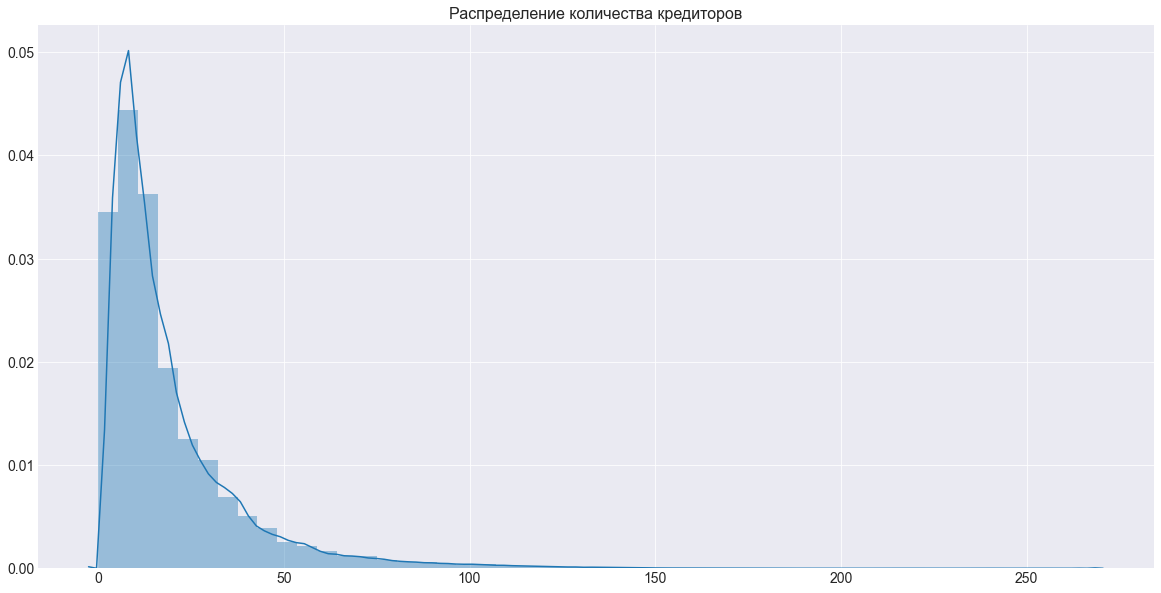

In [103]:
plt.figure(figsize=(20,10))
plt.title("Распределение количества кредиторов", fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df_kiva_loans_trimmed['lender_count'], bins=50, axlabel=False)
plt.show()

Изменим масштаб, для того, чтобы было лучше видно распределение на отрезке от 0 до 100 кредиторов

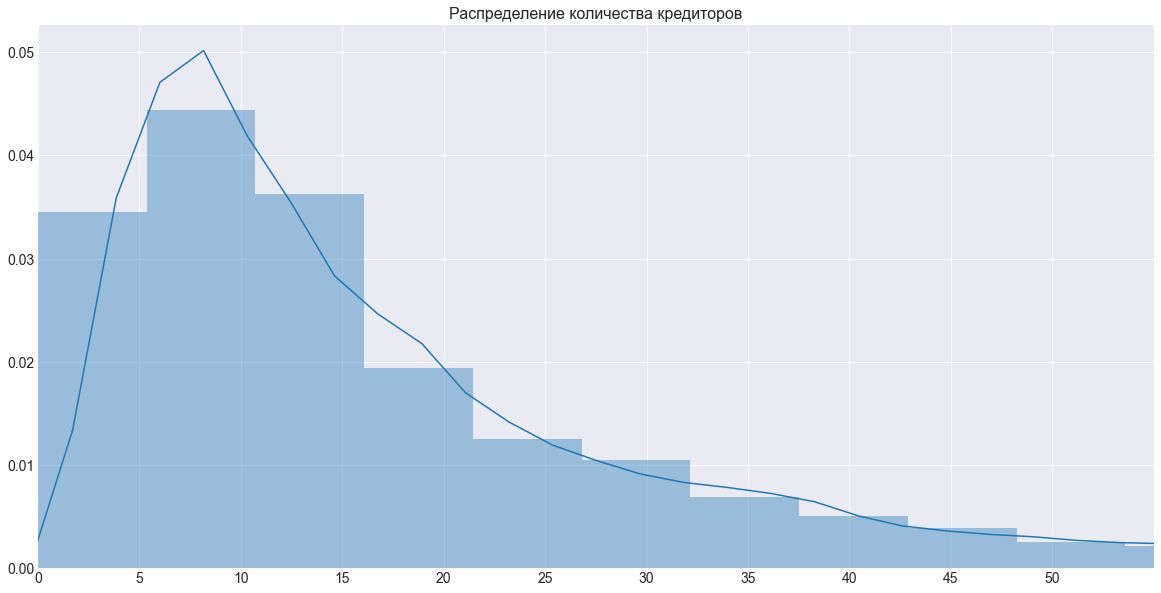

In [104]:
plt.figure(figsize=(20,10))
plt.title("Распределение количества кредиторов", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, 51, 5))
plt.xlim(0,55)

sns.distplot(df_kiva_loans_trimmed['lender_count'], bins=50, axlabel=False)
plt.show()

Исходя из этой гисторгаммы распределения количества кредиторов, можно разбить на условные группы по количеству кредиторов для дальнейшего отображения на графике. Выберем группы: 0-3, 3-7, 7-12, 12-23, 23-100, 100 и более 100.

In [105]:
def func(x): # функция, которая разбивает количество кредиторов на группы
    if x <=0:
        return np.nan
    if 0 < x <= 3:
        return '(0, 3]'
    if 3 < x <= 7:
        return '(3, 7]'
    if 7 < x <= 12:
        return '(7, 12]'
    if 12 < x <= 23:
        return '(12, 23]'
    if 23 < x <= 100:
        return '(23, 100]'
    if x > 100:
        return '100 и более'

In [106]:
lender_count = df_kiva_loans_trimmed[['lender_count', 'loan_amount', 'term_in_months']].sort_values('lender_count') # сортируем по количеству кредиторов по возрастанию
lender_count['lender_count_groups'] = lender_count['lender_count'].apply(func) # применяем первую функцию к столбцу lender_count и записываем в новый столбец lender_count_groups
lender_count_grouped = lender_count.groupby('lender_count_groups', sort=False).median() # группируем по группам lender_count_groups и выводим медианные значения

# второй способ - при помощи встроенного метода pandas.cut
# lender_count['lender_count_groups'] = pd.cut(lender_count.lender_count, bins=[0, 3, 7, 12, 23, 100, 268])
# lender_count_grouped = lender_count.groupby('lender_count_groups').median()

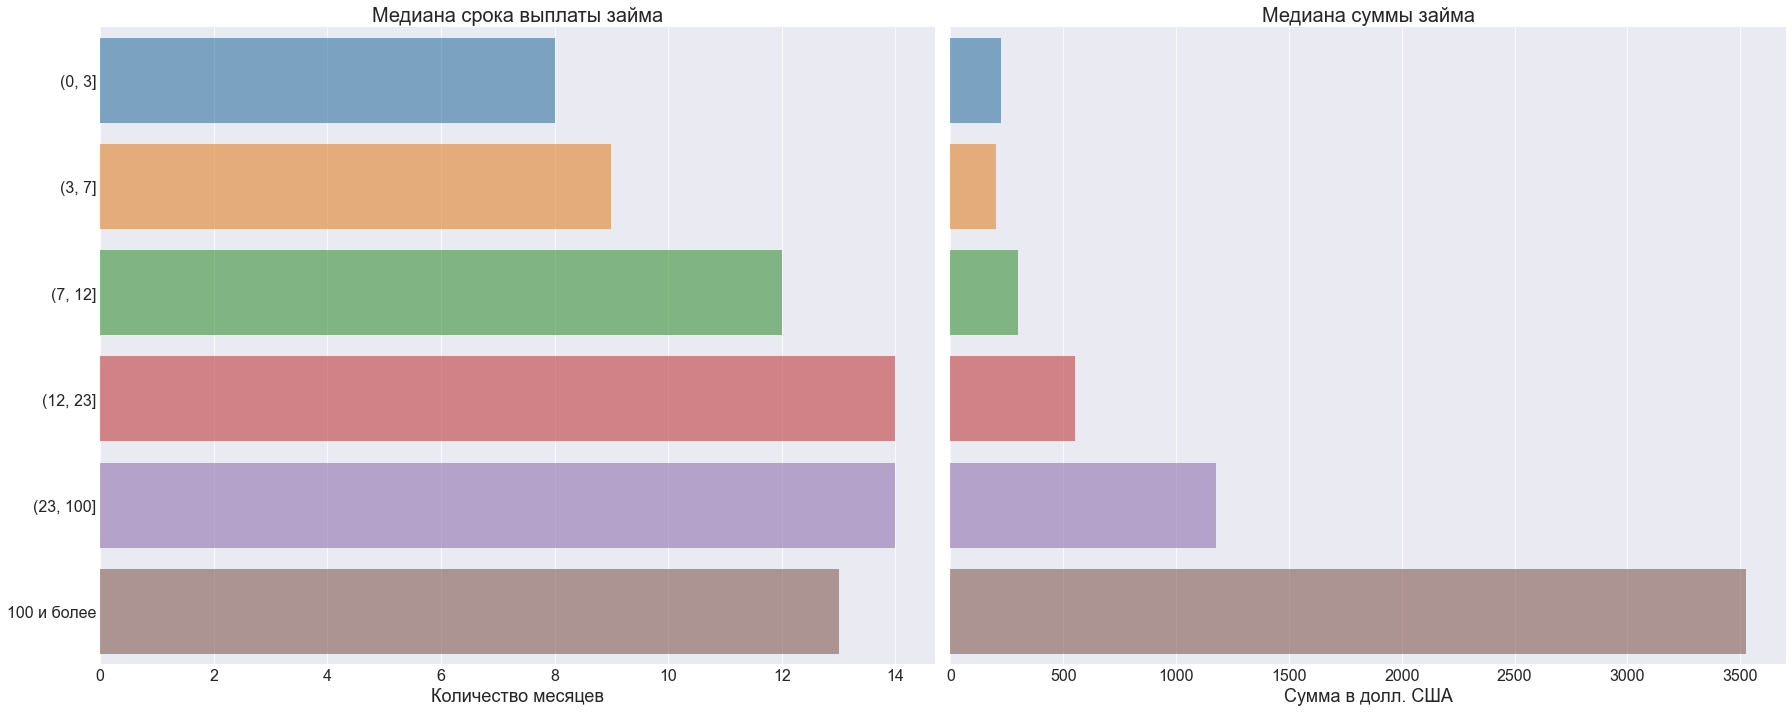

In [107]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y=lender_count_grouped.index, x='term_in_months', data=lender_count_grouped, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=lender_count_grouped.index, x='loan_amount', data=lender_count_grouped, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Мы видим, что **сумма займа увеличивается пропорционально количеству кредиторов**, что вполне ожидаемо. Также мы можем видеть, что **количество кредиторов не сильно зависит от сроков займов** начиная с групп кредиторов от 10 и выше человек. Это может быть обусловлено тем, что чем больше кредиторов участвуют в займе, тем больше и суммы займов (как мы уже заметили), а следовательно временные интервалы займов уравновешиваются этой пропорциональной зависимостью.

### Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения

In [108]:
mpi_loans_terms = df_kiva_loans_trimmed[['country', 'MPI', 'loan_amount', 'term_in_months']][df_kiva_loans_trimmed['country']\
    .isin(list_countries)] # выбираем нужные столбцы в датафрейме и удаляем страны, составляющие менее 0,5% сообщества Kiva

In [109]:
# mpi_loans_terms = mpi_loans_terms.reset_index(drop=True)
# mpi_loans_terms.drop(np.where(mpi_loans_terms['MPI'].eq(0))[0], inplace=True)
# mpi_loans_terms.dropna(inplace=True)

In [110]:
mpi_loans_terms = mpi_loans_terms[mpi_loans_terms['MPI'].astype(bool)]\
    .dropna() # убираем те строки, где MPI имеет значение 0 и пропущенные значения

In [111]:
mpi_loans_terms = mpi_loans_terms.groupby('MPI').median() # группируем по MPI и приводим медианные значения для каждой группы
mpi_loans_terms = mpi_loans_terms.applymap(int) # приводим к целочисленным значениям

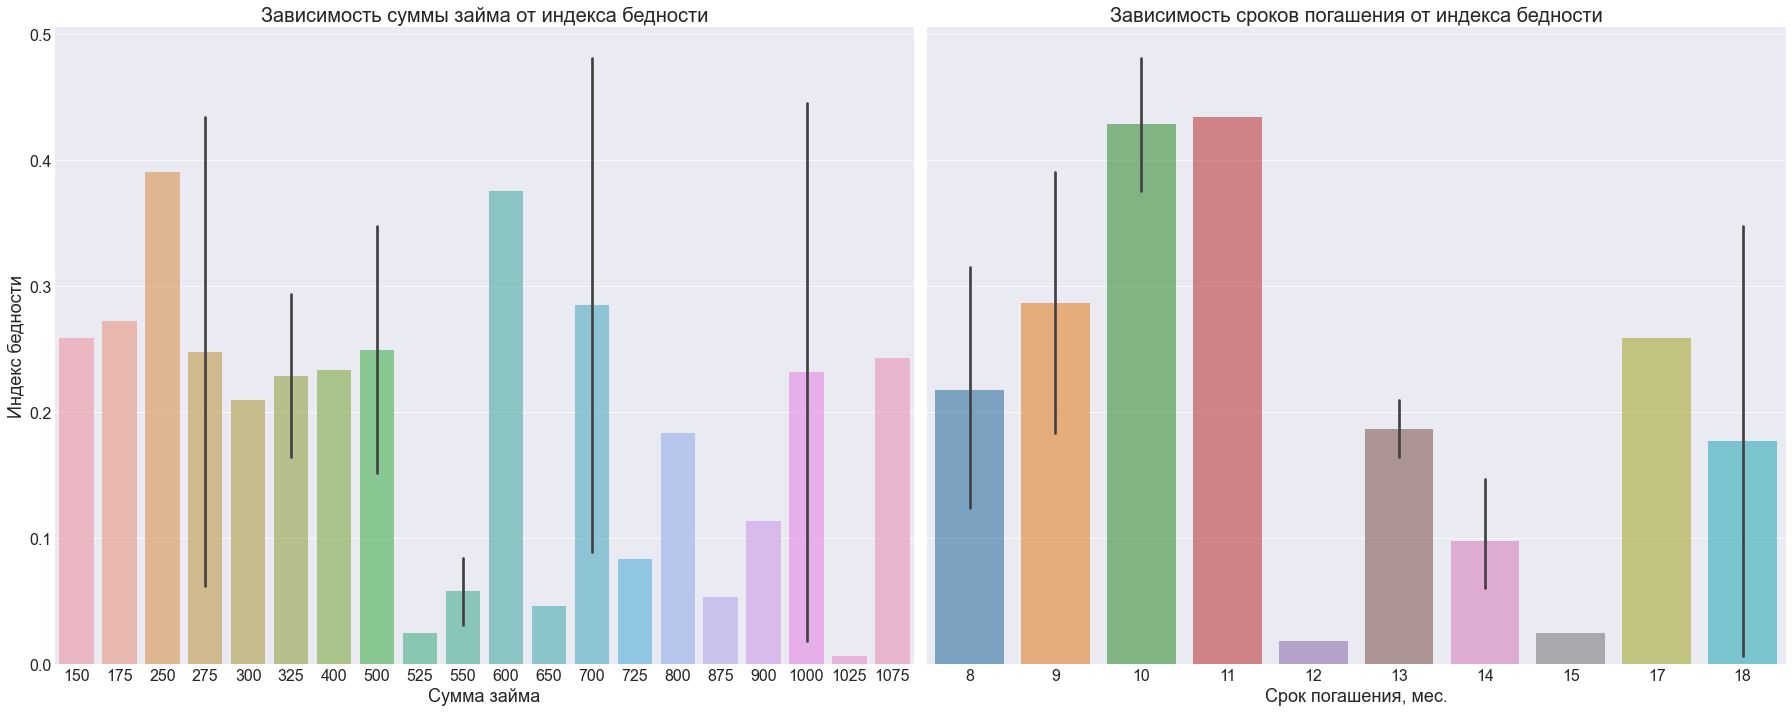

In [112]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y=mpi_loans_terms.index, x='loan_amount', data=mpi_loans_terms, alpha=0.6, ax=ax[0])
ax[0].set_title("Зависимость суммы займа от индекса бедности", fontsize=20)
ax[0].set_xlabel('Сумма займа', fontsize=18)
ax[0].set_ylabel('Индекс бедности', fontsize=18)
ax[0].tick_params(labelsize=16)

sns.barplot(y=mpi_loans_terms.index, x='term_in_months', data=mpi_loans_terms, alpha=0.6, ax=ax[1])
ax[1].set_title("Зависимость сроков погашения от индекса бедности", fontsize=20)
ax[1].set_xlabel('Срок погашения, мес.', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Здесь мы видим, что в странах с высоким уровнем бедности популярны займы на суммы 250 и 600 долларов, с странах со средним уровнем бедности популярны займы до 500, а также на 700, 1000 и 1075 долларов. А в странах с низким уровнем бедности популярны займы на суммы 525, 550, 650, 725, 875 и 1025 долларов. В то время как в странах с высоким уровнем бедности больше всего займов берут на срок в 10-11 месяцев, а в странах с низким уровнем бедности чаще всего берут займы на год или год и 3 месяца.

### Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

Построим 4 графика в разрезе макрорегионов: медианы сумм займов, сроков займов, времени финансирования заявки, а также ежемесячного платежа

In [113]:
by_region = df_country_median.groupby('world_region').median()

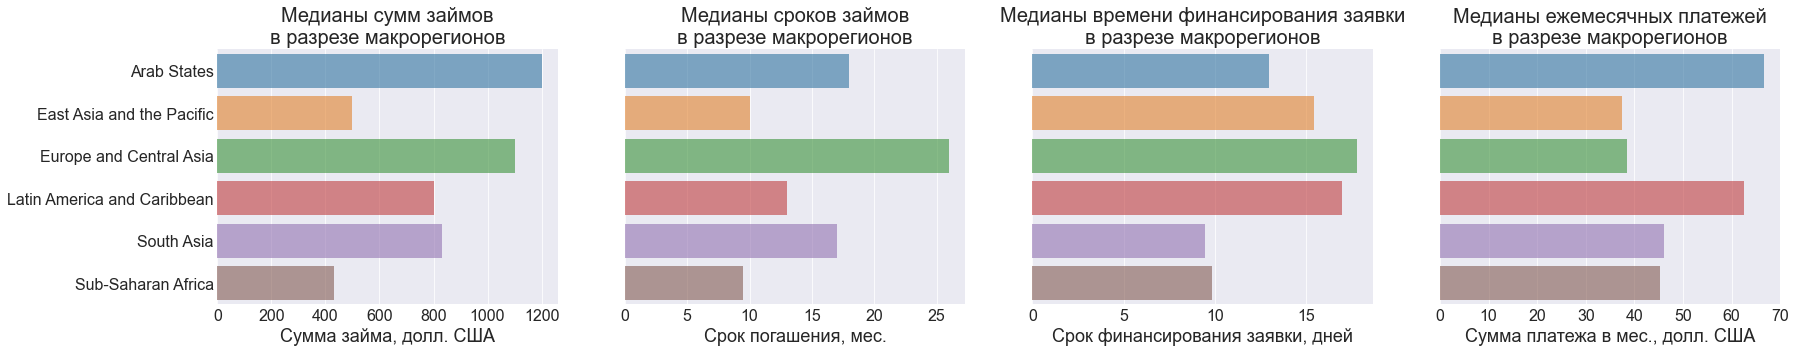

In [114]:
f,ax=plt.subplots(1, 4, sharey=True, figsize=(25,5))

sns.barplot(y=by_region.index, x='loan_amount', data=by_region, alpha=0.6, ax=ax[0])
ax[0].set_title("Медианы сумм займов\nв разрезе макрорегионов", fontsize=20)
ax[0].set_xlabel('Сумма займа, долл. США', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=by_region.index, x='term_in_months', data=by_region, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианы сроков займов\nв разрезе макрорегионов", fontsize=20)
ax[1].set_xlabel('Срок погашения, мес.', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=by_region.index, x='time_funding', data=by_region, alpha=0.6, ax=ax[2])
ax[2].set_title("Медианы времени финансирования заявки\nв разрезе макрорегионов", fontsize=20)
ax[2].set_xlabel('Срок финансирования заявки, дней', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

sns.barplot(y=by_region.index, x='monthly_repayment', data=by_region, alpha=0.6, ax=ax[3])
ax[3].set_title("Медианы ежемесячных платежей\nв разрезе макрорегионов", fontsize=20)
ax[3].set_xlabel('Сумма платежа в мес., долл. США', fontsize=18)
ax[3].set_ylabel(None)
ax[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Наибольшие суммы займов за **Арабскими странами**, соответственно и суммы платежа в месяц - тоже самые высокие. При это сроки погашения около 15 - 20 месяцев, а финансируются заявки за 10-15 дней всего. Это может говорить о высоком уровне доверия кредиторов к странам данного региона. В **Европейских** же странах, хотя суммы займов тоже высокие (но несколько ниже чем в странах Арабского региона), но сроки погашения гораздо выше (превышают 25 месяцев по медианному значению), при этом ежемесячные платежи, совершаемые в этих странах почти в 2 раза меньше, чем в страха Арабского региона.
Самыми же малыми займами пользуются страны **Африки** и **Юго-Восточной Азии**. В странах этих регионов медианные значения займов составляют от 400 до 500 долларов. А сроки погашения займов - около 10 месяцев. Но при этом, в странах **Юго-Восточной Азии** срок финансирования заявки в 1,5 раза дольше чем в странах **Африки**. Возможно, это можно объяснить тем, что заёмщики стран **Африки** нуждаются в деньгах более остро, а их нужды требуют скорейшего получения денег. Однако, при этом заёмшики **Африканских стран** совершают бОльшие ежемесячные платежи чем заёмщики стран **Юго-Восточной Азии**.